***
# Next generation PKPD mesoscale modeling and simulation of nanoscale tumor targeted drug delivery particles.

***
***
# Introduction from research paper
***
***

# __Targeted NanoCarrier Model__

Advantages of Physiological based pharmacokinetic modeling (PBPK): 

- Alternative approach to the modeling and simulation of drug concentration data. 
- More simpler and logical than the compartmental approach since it elimates imaginary compartments and uses real tissue boundaries and tissue volume.

Equations for PBPK Models: 
- Two step process 
    - __Pharmacokinetic__: The delivery of the drug to the tissue (controlled by tissue blood flow).
    - __Pharmacodynamics__: Uptake of the drug by the tissue (controlled by the ability of the drug to diffuse through capillary and cell membrane to the tissue).
- The overall rate of distribution is controlled by the slower of these two steps. 
- Since most drugs are small molecules that can easily pass throug the cell membrance, the PBPK models for these drugs are mostly __perfusion limited__ distribution models. 

## Derivation: 

### __In Non targeted Nanocarrier model__:

After the administration of the drug and a pseudo equillibrium is achieved between the tissue and the blood, a ratio is established between tissue concentration to the blood concentration. This ratio is called __Partition Coefficient (Kp)__.

\begin{equation}
\Large \mathcal{K}_{p} = \frac{C_{Tissue}}{C_{out}}\\
\Large C_{T} = \mathcal{K}_{p}\ C_{out}
\end{equation}

### __In Targeted Nanocarrier Model__:



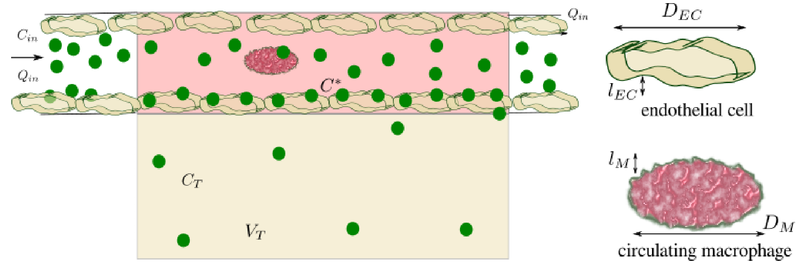

In [1]:
from PIL import Image   
basewidth = 800
img = Image.open('targeted.png')
hsize = int((float(img.size[1]) * float(basewidth / float(img.size[0]))))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)
img

The concentration of NC is enhansed at the endothelial cell boundary therefore

\begin{equation}
\normalsize \text{Conc. of bound Nanocarrier at the endothelial cell membrane} \neq \text{Conc. in Blood}\\
\Large C^\star \neq C_{out}
\end{equation}

Now, the partitioning of NC conc. in the tissue is given by: 

\begin{equation}
\Large C_{T} = \mathcal{K}_{p}\ C^\star
\end{equation}

For PKPD Model, it is necessary to relate C* to Cout. 

Starting with C*, the total number of NCs bound to __an endothelial cell__ is 

\begin{equation}
\Large N^{bound}\ =\ C^{\star}\ l^{2}_{EC}\ \mathcal{L}_{EC,d}
\end{equation}

Where 

\begin{equation}
\normalsize C^{\star} = \text{NC conc. bound to the endothelial cells.}\\
\normalsize l^{2}_{EC} = \text{Cross Section area of one cell (2)}\\
\normalsize \mathcal{L}_{EC,d} = \text{length of the boundary layer within which the NC concentration is enhansed due to binding (1)} 
\end{equation}

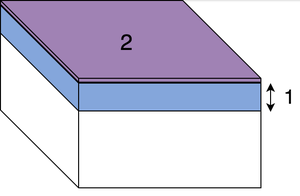

In [2]:
from PIL import Image   
basewidth = 300
img = Image.open('cell.png')
hsize = int((float(img.size[1]) * float(basewidth / float(img.size[0]))))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)
img

The total number of NC bound to an endothelial cell can also be described as: 

\begin{equation}
\Large N^{bound}\ =\ C_{out}\ l^{2}_{EC}\ L_{cap}\ P_{b} 
\end{equation}

Where 

\begin{equation}
\normalsize L_{cap} = \text{size of the cell free layer in the capillary in which the NC marginates}\\
\normalsize P_{b} = \text{probability of NC binding where}\\
\normalsize K_{EC}\ C_{out} = \frac{P_{b}}{1-P_{b}},\ \ otherwise,\ \ P_{b} = \frac{K_{EC}\ C_{out}}{(1 + K_{EC}\ C_{out})}
\end{equation}

When applying the limit 

\begin{equation}
\normalsize K_{EC}\ C_{out} << 1\\
\normalsize P_{b} \approx K_{EC}\ C_{out}
\end{equation}

Substitiuting it back to Nbound, we get: 

\begin{equation}
\Large N^{bound}\ =\ C_{out}\ l^{2}_{EC}\ L_{cap}\ K_{EC}\ C_{out}\\
\Large N^{bound}\ =\ l^{2}_{EC}\ L_{cap}\ K_{EC}\ C_{out}^{2}
\end{equation}

Now comparing both Nbound equations, we get a relationship between C* and Cout: 

\begin{equation}
\Large C^{\star}\ {\color{red}{l^{2}_{EC}}}\ \mathcal{L}_{EC,d}\ =\ {\color{red}{l^{2}_{EC}}}\ L_{cap}\ K_{EC}\ C_{out}^{2}\\
\Large {\color{blue}{C^{\star}}}\ =\ \frac{{\color{blue}{L_{cap}}}}{{\color{blue}{\mathcal{L}_{EC,d}}}}\ {\color{blue}{K_{EC}\ C_{out}^{2}}}
\end{equation}

The above equation describes the bound NC on the endothelial cells but to calculate the total NCs harvested in experimental procedure, we have to account for NCs diffused into the tissue compartment: 

\begin{equation}
\Large N_{tot}\ =\ N_{T} + N_{EC}\\ 
\Large N_{tot}\ =\ \mathcal{K}_{p}\ C^{\star} + C^{\star}\ l^{2}_{EC}\ \mathcal{L}_{EC,d}
\end{equation}

From the total tissue volume, the volume of endothelial cells are measured as: 

\begin{equation}
\Large \varphi_{EC}\ =\ \frac{V_{EC}}{V_{T}}\ =\ \frac{l^{2}_{EC}\ D_{EC}}{V_{T}}\\ 
\end{equation}
where D_{EC} = Endothelial cell Diameter

Substituting the equations, we get
\begin{equation}
\Large V_{T}\ =\ \frac{l^{2}_{EC}\ D_{EC}}{\varphi_{EC}}
\end{equation}

Total conc. of NP in tissue: 

\begin{equation}
\large C_{tot}\ =\ \frac{N_{tot}}{V_{T}} =\ \frac{\mathcal{K}_{p}\ C^{\star} + C^{\star}\ l^{2}_{EC}\ \mathcal{L}_{EC,d}}{\frac{l^{2}_{EC}\ D_{EC}}{\varphi_{EC}}}\\
\large C_{tot}\ =\ \frac{\mathcal{K}_{p}\ C^{\star}\ \varphi_{EC} + C^{\star}\ l^{2}_{EC}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{l^{2}_{EC}\ D_{EC}}\\
\large C_{tot}\ =\ C^{\star}\ \Bigg(\frac{\mathcal{K}_{p}\ \varphi_{EC} + l^{2}_{EC}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{l^{2}_{EC}\ D_{EC}}\Bigg)\\
\large C_{tot}\ =\ \frac{L_{cap}}{\mathcal{L}_{EC,d}}\ K_{EC}\ C_{out}^{2} \Bigg(\frac{\mathcal{K}_{p}\ \varphi_{EC} + l^{2}_{EC}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{l^{2}_{EC}\ D_{EC}}\Bigg)\\
\large C_{tot}\ =\ \frac{L_{cap}}{\mathcal{L}_{EC,d}}\ \Bigg(
\frac{K_{EC}\ C_{out}^{2} \mathcal{K}_{p}\ \varphi_{EC} + K_{EC}\ C_{out}^{2}\ l^{2}_{EC}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{l^{2}_{EC}\ D_{EC}}\Bigg)\\
\large C_{tot}\ =\ \frac{L_{cap}}{\mathcal{L}_{EC,d}}\ \Bigg(\frac{K_{EC}\ C_{out}^{2} \mathcal{K}_{p}\ {\color{red}{\varphi_{EC}}}}{{\color{red}{l^{2}_{EC}\ D_{EC}}}} + \frac{K_{EC}\ C_{out}^{2}\ {\color{red}{l^{2}_{EC}}}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{{\color{red}{l^{2}_{EC}}}\ D_{EC}}\Bigg)\\
\large C_{tot}\ =\ \Bigg\{K_{EC}\ C_{out}^{2} \mathcal{K}_{p}\ + \frac{K_{EC}\ C_{out}^{2}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{D_{EC}}\Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}\\
\end{equation}

To account for the bound NC to other circulating cells (M),

\begin{equation}
\normalsize C_{tot}\ =\ \Bigg\{K_{EC}\ \mathcal{K}_{p}\ C_{out}^{2}\ + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{D_{EC}} C_{out}^{2}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ \varphi_{M}}{D_{M}} C_{out}^{2}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}}
\end{equation}

***
To calculate the %idg: 

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{blue}{K_{EC}\ \mathcal{K}_{p}}}\ C_{out}\ + \frac{{\color{blue}{K_{EC}}}\ \mathcal{L}_{EC,d}\ \varphi_{EC}}{D_{EC}} C_{out}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{{\color{blue}{K_{M}}}\ \mathcal{L}_{M,d}\ \varphi_{M}}{D_{M}} C_{out}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}}
\end{equation}
***

Here 
- %idg = Percentage of injected dose per gram of tissue
- $C_{tot}$ = Total concentration of bound nanocarrier to endothelial cells and other capillary cells and nanocarriers within tissue
- $C_{out}$ = Concentration of nanocarrier in capillary
- $K_{EC}$ and $K_{M}$ = Association constant of nanocarrier to EC cells and other capillary cells respectively, where: 

\begin{equation}
K_a = \normalsize
      \Bigg( \frac{N_{ant}!}{(N_{ant} - n_b)! n_b!}\Bigg)
      \Bigg(\frac{N_{ab}}{n_b}\Bigg)\ \ 
      \Bigg(\frac{\Delta\phi\Delta\theta\Delta\psi}{8\pi^2}\Bigg)\ \times \ 
      \Bigg(\frac{\mathcal{A}_{R}^{b}}{\mathcal{A}_{R}^{u}}\Bigg)^{n_{b}}\ \
      \frac{\mathcal{A}_{N}^{b}L_{z}}{(L_{z} - r^*)} \int^{r^*}_{0} dr\ exp(-\beta\mathcal{W}(r)).
\end{equation}

- $N_{ant}$ = No. of receptors on membrane surface
- $n_b$ = No. of bonds formed upon binding between NC and tissue surface
- $N_{ab}$ = No. of antibodies per NC 
- First two terms represent "__Combinatorial binding for multivalent binding__"
- Third term is called "__NC rotational entropy__"
- $\mathcal{A}^u_R$ = Average area traversed by an unbound receptor molecule = $\frac{\mathcal{A}}{N_{ant}}$ 
- $\mathcal{A}^b_R$ = Average area traversed by the bound receptor molecule. 
- $L_z$ = Dimension of the simulation box along the reaction coordinate
- $r^*$ = cutoff length at which the conformational state of the NC and those of the membrane - receptor system cease to overlap (NC can only exist in unbound state)
- $exp(-\beta\mathcal{W}(r))$ = Boltzmann weight
- Forth term is called "__translational entropy of receptors__" 
- Fifth term is called "__enthalpic contribution__" 

- $\mathcal{K}_{p}$ = Partition coefficient
- $\varphi_EC$ and $\varphi_M$ = conc. of EC cells and Conc. of other capillary cells respectively in tissue. 
- $D_{EC}$ and $D_M$ = diameter of EC cells and other capillary cells respectively. 
- $\mathcal{L}_{EC,d}$ = length of the boundary layer within which the NC concentration is enhansed due to binding.
- $L_{cap}$ = size of the cell free layer in the capillary in which the NC is perfused. 
***

All \%idg scores are presented in scaled units given by: 
\begin{equation} 
\Large \eta = \frac{(\%idg)_{org,sp}}{(\%idg)_{lung,sp}}
\end{equation}
where org = target organ and sp = species.
\begin{equation} 
org = \text{target organ}\\
sp = \text{species}\\
\normalsize \eta_{sim} = \text{Computational model prediction}\\
\normalsize \eta_{exp} = \text{Experimental data}
\end{equation}

__The endothelial targeting of anti-ICAM1-coated NCs in five different organs in mouse are predited and compared to targeting levels measured in in vivo experiments.__

In order to assess the predictive accuracy of the model, pearson's correlation coefficient are computed between model and experiment. 

To make reliable predictions for an NC binding to the target tissue, it is essential to accuartely estimate the model parameter in the equation. This involves two sets of measurement: 

- __Estimation of ($\mathcal{k}$, $\mathcal{A}_{ex}$ and $N_{ant}$) to compute the $K_a$ Association coefficient for both EC and M cells__

__1)__ $\mathcal{k}$ = __Effective bending rigidity__ bending modulus or bulk modulus. It is in the order of $k_BT$ and ranges from 10 - 100 $k_BT$. It is from the Canham - Helfrich phenomenological theory for membrances were 

\begin{equation} 
\large \mathcal{H}_{elastic} = \int^L_0dx \int^L_0dy \Bigg\{\frac{\mathcal{k}}{2}(2H)^2+K_GG\Bigg\}
\end{equation}
where 
\begin{equation} 
\normalsize \mathcal{k} = \frac{Yh^3}{12(1-\sigma^2)}\\
Y = \text{Young's modulus}\\
\sigma = \text{Poisson's ration of the material}\\
h = \text{Thickness of membrance} 
\end{equation}
__2)__ $\mathcal{A}_{ex}$ = __Excess area of the membrane__, From the model for the cell membrane: 

\begin{equation} 
\large \mathcal{H}_{m} = \sum^{N_m}_{v=1} \frac{\mathcal{k}}{2} (c_{1,v}+c_{2,v})^2\mathcal{A}_v+\sigma\mathcal{A}_v
\end{equation}
where 
\begin{equation}
\normalsize N_m = \text{Triangulated surface with $N_m$ nodes, $T_m$ triangles and $L_m$ links. such that $N_m +T_m -L_m = 0$}\\
\normalsize \sigma = \text{surface tension of the membrane}\\
\normalsize c_{1,v}\ and\ c_{2,v} = \text{two principle curvatures at vertex v}\\
\normalsize \mathcal{A}_v = \text{curvilinear area of te discrete membrane associated with vertex v, such that the total curvilinear area is:}\\
\normalsize \mathcal{A} = \sum^{N_m}_{v=1} \mathcal{A}_v\ \ \text{where}\ \ \mathcal{A}_{ex} = 100\frac{\mathcal{A}-\mathcal{A}_p}{\mathcal{A}}\\
\normalsize \text{which in terms of A:}\ \mathcal{A} = \frac{\mathcal{A}_p}{100-\mathcal{A}_{ex}} = \frac{\mathcal{L}^2}{100-\mathcal{A}_{ex}}
\end{equation}
Therefore, 
\begin{equation} 
\large \mathcal{H}_{m} = \sum^{N_m}_{v=1}\mathcal{A}_v \Bigg(\frac{\mathcal{k}}{2} (c_{1,v}+c_{2,v})^2+\sigma\Bigg)\\
\large \mathcal{H}_{m} = \frac{\mathcal{L}^2}{100-\mathcal{A}_{ex}} \Bigg(\frac{\mathcal{k}}{2} (c_{1,v}+c_{2,v})^2+\sigma\Bigg)
\end{equation}
with respect to the system (membrane), the actual values of $\mathcal{A}_{ex}$ is determined by the system of constant variables ( Temp, $\mathcal{A}_p$, $\sigma$)

__3)__ including Nant, the Total energy of the NC - membrane system is given by 

\begin{equation} 
\large \mathcal{H}_{t} = \mathcal{H}_{m} + \sum^{N_{ant}}_{i=1}\mathcal{H}_{f}(\theta_i) + \sum^{N_{ant}}_{i=1}\sum^{N_{ab}}_{j=1} \mathcal{H}_{b}(d_{ij})
\end{equation}


- Estimate for $\mathcal{K}_p$, $\varphi_X$, $\mathcal{L}_{X,b}$ and $D_x$ to compute the biodistribution. 



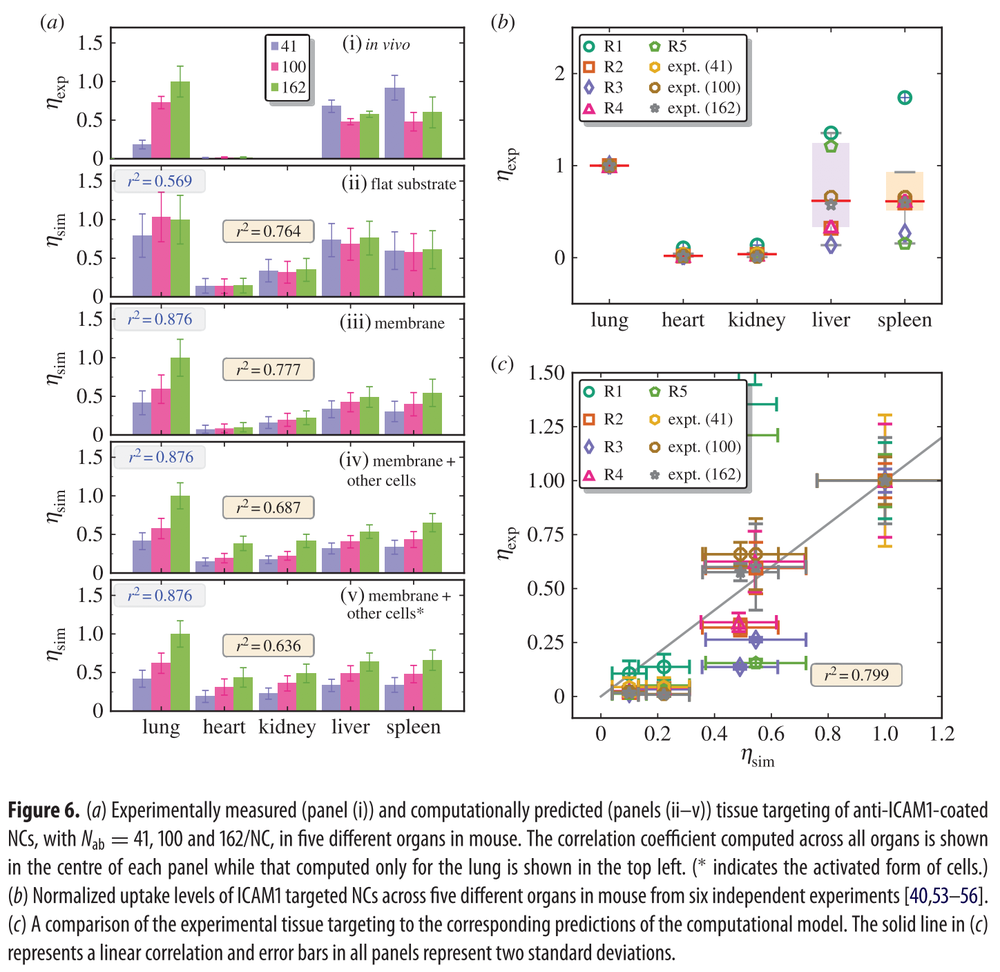

In [3]:
from PIL import Image   
basewidth = 1000
img = Image.open('nexpnsim.png')
hsize = int((float(img.size[1]) * float(basewidth / float(img.size[0]))))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)
img

***
***
# New model with third term
***
***

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{blue}{\mathcal{K}_{p}}} + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{EC}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ {\color{blue}{\varphi_{M}}}}{D_{M}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}} + 
\Bigg\{\frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{Liver}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}
\end{equation}

## Loading libraries: 

In [4]:
import numpy,os,sys,scipy
import scipy.stats.mstats as scp
import pickle
from mpl_toolkits.axes_grid.inset_locator import *
from scipy.stats.stats import pearsonr
from scipy import stats as ss
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot, row, column
from bokeh.plotting import figure
from bokeh.core.properties import value
from bokeh.models import ColumnDataSource, Whisker, Label
from bokeh.transform import dodge
from pprint import pprint 

import pandas as pd
import numpy as np

from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure

from bokeh.models import CategoricalColorMapper, HoverTool, ColumnDataSource, Panel
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs

from bokeh.layouts import column, row, WidgetBox
from bokeh.palettes import Category20_16

from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

from bokeh.io import export_png

output_notebook()

/Users/pradeep/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Loading BokehJS ...

## Function for creating the experimental dataset: 

In [5]:
class compute_proteinlevels():
    
    def __init__(self):
        "class to compute the protein levels from existing data"
        
        #data from Murciano et. al. 2003
        self.m_murciano={'lung':16.8,'liver':4.71,'heart':1.07,'kidney':2.04,'spleen':5.38}
        self.mp_murciano={}
        
        #GCRMA scores from BIOGPS.org
        self.m_biogps={'lung':8588.7,'liver':97.57,'heart':155.19,'kidney':133.09,'spleen':1395.32}
        self.mp_biogps={}
        
        #ppm scores from MOPED
        self.m_moped={'lung':738,'liver':150,'heart':'none','kidney':'none','spleen':'none'}
        self.mp_moped={}

        #ppm scores from PAXDB
        self.m_paxdb={'lung':407,'liver':29.8,'heart':0.07,'kidney':7.16,'spleen':26.8}
        self.mp_paxdb={}

        self.m_lung_ref=2000               
        #set the refernce value at 2000 antigens per square micron

        self.mouseprotein={} 

        self.dbnames=['murciano','biogps','moped','paxdb','mean']
        self.dbmouse={'murciano':self.m_murciano,'biogps':self.m_biogps,'moped':self.m_moped,'paxdb':self.m_paxdb}
        self.dbmprot={'murciano':self.mp_murciano,'biogps':self.mp_biogps,'moped':self.mp_moped,'paxdb':self.mp_paxdb,'mean':self.mouseprotein}

    #--------------------------------------------------------------------------------------------------------------------------------------------

    def get_mouse_protein_exp(self,organs):

        for organ in organs:
            prot=[]
            for dbname in self.dbnames[0:-1]:
                db,pdb=self.dbmouse[dbname],self.dbmprot[dbname]
                try:
                    protexp=self.m_lung_ref*db[organ.lower()]/db['lung']
                    pdb[organ.lower()]=protexp
                    prot.append(protexp)
                except:
                    pdb[organ.lower()]='none'
            self.mouseprotein[organ.lower()]=scp.gmean(prot)


        return self.mouseprotein
    

## Functions to create the simulation from model: 

In [6]:
class compute_biodistribution: 
    "class to handle all calculation for computing the Ka values"

    def __init__(self,model,kamode):
        self.model = model
        self.kamode = kamode
        self.simtoexp_protconv = 4                                   # conversion between protein number in simulation to that in micron^2
        self.antigendensity=[200,500,1000,2000,4000] 
        self.kappa = {'lung':40,'liver':40,'heart':40,'kidney':40,'spleen':40}
        self.aex = {'lung':'medium','liver':'medium','heart':'small','kidney':'medium','spleen':'large'}
        self.macrophage = {'lung':0.0,'liver':1.0,'heart':0.0,'kidney':0.0,'spleen':1.0}                     #data taken from J Exp Med. 1985, 161(3), 475--489
        self.bldict = {'large':0.25,'medium':0.5,'small':1.5}                                                 #marker for excess area

        #biodistribution as a function of antibody density for different tissues
        self.antibody_dict ={41:'low',100:'medium',162:'high'}

        #experimental scores for ICAM coated nanoparticles (experiments from Vlad)
        self.IDg_Vlad_ICAM = {'lung':{'low':[23,7],'medium':[91,10],'high':[125,25]}, 
                 'liver':{'low':[85,10],'medium':[60,5],'high':[72,5]},
                 'spleen':{'low':[115,20],'medium':[60,15],'high':[75,25]},
                 'heart':{'low':[1,1],'medium':[2,1],'high':[2,1]},
                 'kidney':{'low':['none','none'],'medium':['none','none'],'high':['none','none']}}

        #experimental scores for IgG coated nanoparticles (experiments from Vlad)
        self.IDg_Vlad_IgG = {'lung':[15,2],'liver':[65,5],'spleen':[60,5],'heart':[1,1],'kidney':['none','none']}     
        
        # K_a values for various simulation systems
        with open('./Computation/data/ka_relerror_dict-'+self.kamode+'.pkl','rb') as filenamesKa:
            self.ka = pickle.load(filenamesKa, encoding='bytes')

        
        # EC and macrophage parameters
        self.ecdim  =  [0.3,5E-6,100E-9] #(10.1002/adem.201080076)    # concentration, lateral size of Endothelial cells, and PMF range
        self.mphdim =  [0.03,5E-6,100E-9]  #(doi:10.1083/jcb.50.2.498)  #  of Macrophages

        #(nm^3)/particle   to (molar)^{-1}
        self.nm3tomolar = 6.023E-1

        
#------------------------------------------------------------------------------------------------
    # used in compute_ka_values 
    # used in compute_ka_value 
    
    def get_antigen_limits(self,expression):
        "compute the appropriate antigen limits for the given protein expression"
        "(ex) for expression = 1500, returns 1000 and 2000 since 1500 falls between them."
        
        #select the value of antigens that flanks the given expression number
        # In "try", it looks for the values of antigendensity of [200,500,1000,2000,4000]
        # for lung where expression is 1999.99, the results is the 3rd and 4th element for the for loop. 
        # It take the first element as of this list as its "firstval" value. 
        # if there is a expression value above 4000 such as 4001, then it get redirected to "except" 
        # here it takes the highest values in the antigendensity list which is 4000, the 4th element. 
        try:
            firstval= [i for i in range(len(self.antigendensity)) if (self.antigendensity[i]-expression)>=0][0]
        except:
            firstval = len(self.antigendensity)-1

        # here if the mouse expression level is lower than 200 and the firstval value is the 1st element
        # then it takes the i1 value as 0 and i2 value as 200 
        # if the firstval value is above 0 then the for example the resulting value for lung will be 
        # i1 = 1000, i2 = 2000 
        if firstval==0:
            i1,i2=0,self.antigendensity[firstval]

        else:
            i1,i2=self.antigendensity[firstval-1],self.antigendensity[firstval]

        return [int(i1),int(i2)]

    
#------------------------------------------------------------------------------------------------
    # used in compute_ka_values 
    # used in compute_ka_value 
    
    def get_kavalue(self,config,abval,antigennum,kappa=0.0,aex=0.0):
        "get the correct Ka value"
        if antigennum==0:
            ka=[1,0]
        else:
            if config == 'membrane':    
                ka=self.ka[abval][antigennum/self.simtoexp_protconv][kappa][aex]
            if config == 'flat':
                 ka=self.ka[abval][antigennum/self.simtoexp_protconv][b'flat']
        
        return ka

#-----------------------------------------------------------------------------------------------
    # used in process_Ka_with_error
    
    def get_allvals(self,ka):
        if ka[1]>0:
            kae = [max(0,ka[0]-ka[0]*ka[1]),ka[0],ka[0]*(1+ka[1])]
        else:
            kae = [ka[0]]

        return kae


    
#-----------------------------------------------------------------------------------------------
    # used in compute_Ka_value 
    # used in compute_Ka_values
    
    def process_idg_with_error(self,ecval,mphageval,iteration):
        ' receives a set of input parameters and computes %idg with error bar'
        KIgG,ka1,ka2,dne1,dne2 = ecval
        kp_mphage,mka1,mka2,dnm1,dnm2,MPConc = mphageval
        Variable, value = iteration
        
        if Variable == 'Cout':
            Cout = value
        elif Variable != 'Cout':
            Cout = 1E-13
        
        if Variable == 'Qec': 
            QEC = value/100
        elif Variable != 'Qec': 
            QEC = self.ecdim[0]
        
        if Variable == 'Qm': 
            QM = value/100
        elif Variable != 'Qm': 
            QM = self.mphdim[0]
        
        if Variable == 'Kp': 
            KP = value*KIgG
        elif Variable != 'Kp': 
            KP = 1000*KIgG
        
        pterm1 = QEC*self.ecdim[2]/self.ecdim[1]
        pterm2 = MPConc*QM*self.mphdim[2]/self.mphdim[1]

        kaec1,kaec2 = self.get_allvals(ka1),self.get_allvals(ka2)
        kamp1,kamp2 = self.get_allvals(mka1),self.get_allvals(mka2)
        idgval = []
        for k1 in kaec1:
            
            for k2 in kaec2:
                
                KEC = (k1**dne1) * (k2**dne2)*self.nm3tomolar                      # interpolated value of KEC  
                
                if self.model == 'model1':
                    term1 = KIgG + KEC*pterm1
                elif self.model == 'model2':
                    term1 = KP + KEC*pterm1*Cout

                term2 = 0.0
                for k3 in kamp1:
                    
                    for k4 in kamp2:
                        
                        KMP = (k3**dnm1) * (k4**dnm2) * self.nm3tomolar
                        
                        if self.model == 'model1':
                            term2 = kp_mphage + KMP*pterm2
                        elif self.model == 'model2':
                            term2 = KMP*pterm2*Cout
                            
                        kptarg = term1 + term2

                        if kptarg > 0.0:
                            kptarg = max(0,numpy.log10(kptarg))
                        else:
                            kptarg = 0.0
                        idgval.append(kptarg)
                    
        return idgval       

    def process_idg_with_errormode1(self,ecval,mphageval,mode5,organ,iteration):
        ' receives a set of input parameters and computes %idg with error bar'
        KIgG,ka1,ka2,dne1,dne2 = ecval
        kp_mphage,mka1,mka2,dnm1,dnm2,MPConc = mphageval
        ka1mode1,ka2mode1,dne1mode1,dne2mode1 = mode5
        Variable, value = iteration
        
        if Variable == 'Cout':
            Cout = value
        elif Variable != 'Cout':
            Cout = 1E-13
        
        if Variable == 'Qec': 
            QEC = value/100
        elif Variable != 'Qec': 
            QEC = self.ecdim[0]
        
        if Variable == 'Qm': 
            QM = value/100
        elif Variable != 'Qm': 
            QM = self.mphdim[0]
        
        if Variable == 'Kp': 
            KP = value*KIgG
        elif Variable != 'Kp': 
            KP = 1000*KIgG
        
        if Variable == 'Qs': 
            QS = value/100
        elif Variable != 'Qs': 
            QS = self.ecdim[0]
        
        pterm1 = QEC*self.ecdim[2]/self.ecdim[1]
        pterm2 = MPConc*QM*self.mphdim[2]/self.mphdim[1]
        if organ == 'liver':
            pterm3 = QS*self.ecdim[2]/self.ecdim[1]
        else: pterm3 = 0
        
        kaec1,kaec2 = self.get_allvals(ka1),self.get_allvals(ka2)
        kamp1,kamp2 = self.get_allvals(mka1),self.get_allvals(mka2)
        kaec1mode1, kaec2mode1 = self.get_allvals(ka1mode1),self.get_allvals(ka2mode1)
        idgval = []
        if organ == 'liver': 
            
            for k1 in kaec1:
            
                for k2 in kaec2:

                    KEC = (k1**dne1) * (k2**dne2)*self.nm3tomolar                      # interpolated value of KEC  

                    if self.model == 'model1':
                        term1 = KIgG + KEC*pterm1
                    elif self.model == 'model2':
                        term1 = KP + KEC*pterm1*Cout

                    term2 = 0.0
                    
                    for k3 in kamp1:

                        for k4 in kamp2:

                            KMP = (k3**dnm1) * (k4**dnm2) * self.nm3tomolar

                            if self.model == 'model1':
                                term2 = kp_mphage + KMP*pterm2
                            elif self.model == 'model2':
                                term2 = KP*pterm2*Cout
                            
                            term3 = 0.0 
                            for k5 in kaec1mode1: 
                                
                                for k6 in kaec2mode1: 
                                    
                                    KS = (k5**dne1mode1) * (k6**dne2mode1) * self.nm3tomolar
                                    term3 = KS*pterm3*Cout
                            
                                    kptarg = term1 + term2 + term3

                                    if kptarg > 0.0:
                                        kptarg = max(0,numpy.log10(kptarg))
                                    else:
                                        kptarg = 0.0
                                    idgval.append(kptarg)
        
        else: 
            for k1 in kaec1:

                for k2 in kaec2:

                    KEC = (k1**dne1) * (k2**dne2)*self.nm3tomolar                      # interpolated value of KEC  

                    if self.model == 'model1':
                        term1 = KIgG + KEC*pterm1
                    elif self.model == 'model2':
                        term1 = KP + KEC*pterm1*Cout

                    term2 = 0.0
                    for k3 in kamp1:

                        for k4 in kamp2:

                            KMP = (k3**dnm1) * (k4**dnm2) * self.nm3tomolar

                            if self.model == 'model1':
                                term2 = kp_mphage + KMP*pterm2
                            elif self.model == 'model2':
                                term2 = KMP*pterm2*Cout

                            kptarg = term1 + term2

                            if kptarg > 0.0:
                                kptarg = max(0,numpy.log10(kptarg))
                            else:
                                kptarg = 0.0
                            idgval.append(kptarg)
        
        return idgval  

#------------------------------------------------------------------------------------------------
    # used in main code
    
    def compute_idg_values(self,organs,protexpr,abval,KpIgG,mphage,concentration,components,index,debug = False):
        "Compute the %idg value for a given organ"      
        if index[2] != 'mode5':
            kavalues={}
            MPConc, KIgG, KEC, KMP = 0.0,0.0,0.0,0.0
            df = pd.DataFrame([])
            for count, organ in enumerate(organs):
                # The lower() command turns the organs list elements to lower cases. 
                # then the protexpr takes the specific exp. protein expression data and saves it as protnum. 
                # for example the first organs in the list is Lung and its Protein expression level is 1999.99
                # exprlim is the i1 and i2 values that enclose the protnum value from the antigendensity list 
                # antigendensity list = 200, 500, 1000, 2000, 4000.  
                # For example in lung, the values enclosing its protnum = 1999.99 is 1000 and 2000 

                protnum = protexpr[organ.lower()]                               # protein level  for organ (expt)

                exprlim = self.get_antigen_limits(protnum)                      # the protein expressions for interpolation (sim)

                # Here kappa is 40 for all organs 
                # aex is medium for lung, liver and kidney, small for heart and large for spleen 
                # bldict is large = 0.25, medium = 0.5 and small = 1.5 
                # for example, for the command ka=biodistrib.ka[41][250][40][0.5], the value of ka = [957444515750678.2, 2.6112391596329734]
                kptarg = 0.0
                if components[0] == 'membrane': 
                    kappa = self.kappa[organ.lower()]                                  # kappa  for organ (expt)
                    aex = self.bldict[self.aex[organ.lower()]]                         # aex for organ  (expt)
                    ka1 = self.get_kavalue('membrane',abval,exprlim[0],kappa,aex)      # Ka value for the lower limit  (sim)
                    ka2 = self.get_kavalue('membrane',abval,exprlim[1],kappa,aex)      # Ka value for the upper limit (sim)                    

                elif components[0] == 'flat':
                    ka1 = self.get_kavalue('flat',abval,exprlim[0])                # Ka value for the lower limit (flat substrate sim)
                    ka2 = self.get_kavalue('flat',abval,exprlim[1])                # Ka value for the upper limit (flat substrate sim)                    

                else:
                    print ('invalid option for computing Ka values \n')
                    print ('you supplied : ', components)

                    print ('valid options for components[0]="flat" or "membrane"')
                    print ('exiting')
                    sys.exit()                

                # this takes the KpIgG_mouse values, eg) for lung[15, 2], this take the KIgG = 15 for lung. 
                if components[2] == 'KpIgG':
                    if KpIgG[organ][0] != 'none':
                        KIgG = KpIgG[organ][0]

                dne1,dne2 = 1.0*(exprlim[1]-protnum)/(exprlim[1]-exprlim[0]),1.0*(protnum-exprlim[0])/(exprlim[1]-exprlim[0]) # interpolation limit for protein expr.
                term2,pterm2 = 0.0, 0.0
                mka1,mka2 = [0,0],[0,0]
                dnm1,dnm2 = 0,0
                kp_mphage = 0.0

                if components[1] == 'mphage':
                    protnum1 = mphage[1]
                    exprlim1 = self.get_antigen_limits(protnum1)                                      # the protein expressions for interpolation (sim)
                    mka1 = self.get_kavalue('membrane',mphage[0],exprlim1[0],mphage[2],mphage[3])      # Ka value for the lower limit  (sim)
                    mka2 = self.get_kavalue('membrane',mphage[0],exprlim1[1],mphage[2],mphage[3])      # Ka value for the upper limit (sim)                    
                    dnm1,dnm2 = 1.0*(exprlim1[1]-protnum1)/(exprlim1[1]-exprlim1[0]),1.0*(protnum1-exprlim1[0])/(exprlim1[1]-exprlim1[0])
                kp_mphage = KIgG
                MPConc = self.macrophage[organ.lower()]                                          # Macrophage Conc (sim)

                idgval = self.process_idg_with_error([KIgG,ka1,ka2,dne1,dne2],[kp_mphage,mka1,mka2,dnm1,dnm2,MPConc],[index[0],index[1]]) #combine values to form an idg with errorbar   

                kpfinal,kperror = numpy.mean(idgval),numpy.sqrt(numpy.std(idgval))

                IND = pd.MultiIndex.from_product([[index[0]],[index[1]],[index[2]],[organ]],
                                                  names = ['Local Variable','Value','Mode','Organ'])
                columns = pd.MultiIndex.from_product([['idg','idgSD','AllidgValues'], [abval]],
                                         names=['Results', 'Abval'])

                data = [[kpfinal, kperror, idgval]]

                matrix = pd.DataFrame(data, index=IND, columns=columns)

                if count == 0: 
                    allmatrix = matrix 
                else: 
                    allmatrix = allmatrix.append(matrix)
                    
        elif index[2] == 'mode5':
            kavalues={}
            MPConc, KIgG, KEC, KMP = 0.0,0.0,0.0,0.0
            df = pd.DataFrame([])
            for count, organ in enumerate(organs):
                # The lower() command turns the organs list elements to lower cases. 
                # then the protexpr takes the specific exp. protein expression data and saves it as protnum. 
                # for example the first organs in the list is Lung and its Protein expression level is 1999.99
                # exprlim is the i1 and i2 values that enclose the protnum value from the antigendensity list 
                # antigendensity list = 200, 500, 1000, 2000, 4000.  
                # For example in lung, the values enclosing its protnum = 1999.99 is 1000 and 2000 

                protnum = protexpr[organ.lower()]                               # protein level  for organ (expt)

                exprlim = self.get_antigen_limits(protnum)                      # the protein expressions for interpolation (sim)

                # Here kappa is 40 for all organs 
                # aex is medium for lung, liver and kidney, small for heart and large for spleen 
                # bldict is large = 0.25, medium = 0.5 and small = 1.5 
                # for example, for the command ka=biodistrib.ka[41][250][40][0.5], the value of ka = [957444515750678.2, 2.6112391596329734]
                kptarg = 0.0
                if components[0] == 'membrane': 
                    kappa = self.kappa[organ.lower()]                                  # kappa  for organ (expt)
                    aex = self.bldict[self.aex[organ.lower()]]                         # aex for organ  (expt)
                    ka1 = self.get_kavalue('membrane',abval,exprlim[0],kappa,aex)      # Ka value for the lower limit  (sim)
                    ka2 = self.get_kavalue('membrane',abval,exprlim[1],kappa,aex)      # Ka value for the upper limit (sim)                    
                  

                else:
                    print ('invalid option for computing Ka values \n')
                    print ('you supplied : ', components)

                    print ('valid options for components[0]="flat" or "membrane"')
                    print ('exiting')
                    sys.exit()                
                # calucation for mode 1 part of mode 5:
                ka1mode1 = self.get_kavalue('flat',abval,exprlim[0])                # Ka value for the lower limit (flat substrate sim)
                ka2mode1 = self.get_kavalue('flat',abval,exprlim[1])                # Ka value for the upper limit (flat substrate sim)  
                
                # this takes the KpIgG_mouse values, eg) for lung[15, 2], this take the KIgG = 15 for lung. 
                if components[2] == 'KpIgG':
                    if KpIgG[organ][0] != 'none':
                        KIgG = KpIgG[organ][0]
                
                
                dne1,dne2 = 1.0*(exprlim[1]-protnum)/(exprlim[1]-exprlim[0]),1.0*(protnum-exprlim[0])/(exprlim[1]-exprlim[0]) # interpolation limit for protein expr.
                term2,pterm2 = 0.0, 0.0
                mka1,mka2 = [0,0],[0,0]
                dnm1,dnm2 = 0,0
                kp_mphage = 0.0
                dne1mode1,dne2mode1 = dne1,dne2

                if components[1] == 'mphage':
                    protnum1 = mphage[1]
                    exprlim1 = self.get_antigen_limits(protnum1)                                      # the protein expressions for interpolation (sim)
                    mka1 = self.get_kavalue('membrane',mphage[0],exprlim1[0],mphage[2],mphage[3])      # Ka value for the lower limit  (sim)
                    mka2 = self.get_kavalue('membrane',mphage[0],exprlim1[1],mphage[2],mphage[3])      # Ka value for the upper limit (sim)                    
                    dnm1,dnm2 = 1.0*(exprlim1[1]-protnum1)/(exprlim1[1]-exprlim1[0]),1.0*(protnum1-exprlim1[0])/(exprlim1[1]-exprlim1[0])
                
                kp_mphage = KIgG
                MPConc = self.macrophage[organ.lower()]                                          # Macrophage Conc (sim)

                idgval = self.process_idg_with_errormode1([KIgG,ka1,ka2,dne1,dne2],[kp_mphage,mka1,mka2,dnm1,dnm2,MPConc],[ka1mode1,ka2mode1,dne1mode1,dne2mode1],organ,[index[0],index[1]]) #combine values to form an idg with errorbar   

                kpfinal,kperror = numpy.mean(idgval),numpy.sqrt(numpy.std(idgval))

                IND = pd.MultiIndex.from_product([[index[0]],[index[1]],[index[2]],[organ]],
                                                  names = ['Local Variable','Value','Mode','Organ'])
                columns = pd.MultiIndex.from_product([['idg','idgSD','AllidgValues'], [abval]],
                                         names=['Results', 'Abval'])

                data = [[kpfinal, kperror, idgval]]

                matrix = pd.DataFrame(data, index=IND, columns=columns)

                if count == 0: 
                    allmatrix = matrix 
                else: 
                    allmatrix = allmatrix.append(matrix)
            
            if debug:                            
                print (organ,'->',abval,'->',KIgG,'->',KEC,'->',KMP,'->',kpfinal,'->',kperror)
                print ('\n------------------------------------------------->\n')
                
        return allmatrix

    
#------------------------------------------------------------------------------------------------

    def NormalizeIdgValue(self,organs,abdens,simdata,ExpData = False):
        
        n,n1=0,0
        maxval,maxval1=[],[]

        d={}
        for fo in abdens: 
            d["{0}count".format(fo)]=[]
            d["{0}error".format(fo)]=[]
            d["{0}upper".format(fo)]=[]
            d["{0}lower".format(fo)]=[]

        for organ in organs:
            m=0
            for ab in abdens:
                if ExpData == False: 
                    sdata = simdata[ab][organ.lower()]
                elif ExpData == True: 
                    sdata = self.IDg_Vlad_ICAM[organ.lower()][self.antibody_dict[ab]]
                if sdata[0] != 'none':
                    d["{0}count".format(ab)].append(sdata[0])
                    d["{0}error".format(ab)].append(sdata[1])
                    d["{0}upper".format(ab)].append(sdata[0]+sdata[1])
                    d["{0}lower".format(ab)].append(sdata[0]-sdata[1])
                if sdata[0] == 'none': 
                    d["{0}count".format(ab)].append(0)
                    d["{0}error".format(ab)].append(0)
                    d["{0}upper".format(ab)].append(0)
                    d["{0}lower".format(ab)].append(0)

                n1 += 1
                m += 1
            n += 1            
        
        if ExpData == False: 
            normval = simdata[162]['lung'][0]
        elif ExpData == True: 
            normval=self.IDg_Vlad_ICAM['lung']['high'][0]
        
        div=[]
        for div in abdens: 
            d["{0}count".format(div)]= list(map(lambda x: x/normval, d["{0}count".format(div)]))
            d["{0}error".format(div)]= list(map(lambda x: x/normval, d["{0}error".format(div)]))
            d["{0}upper".format(div)]= list(map(lambda x: x/normval, d["{0}upper".format(div)]))
            d["{0}lower".format(div)]= list(map(lambda x: x/normval, d["{0}lower".format(div)]))

        d["organs"] = organs

        if ExpData == True:  
            datadict={}
            for ab in abdens:
                datadict1={}
                for organ in organs:
                        exdata = self.IDg_Vlad_ICAM[organ.lower()][self.antibody_dict[ab]]
                        if exdata[0] != 'none':
                            datadict1[organ]=exdata  
                datadict[ab]=datadict1
        elif ExpData == False: 
            datadict = []
        
        return d, datadict
    
#-----------------------------------------------------------------------------------------------------------------------------------------------------
    
    def vlad_experiments(self,organs,abdens):
   
        for count1, ab in enumerate(abdens):
            for count2, organ in enumerate(organs):
                
                exdata = self.IDg_Vlad_ICAM[organ.lower()][self.antibody_dict[ab]]
                
                IND = pd.MultiIndex.from_product([['Exp'],['Exp'],['Exp'],[organ]], names = ['Local Variable','Value','Mode','Organ'])
                columns = pd.MultiIndex.from_product([['idg','idgSD','AllidgValues'], [ab]], names=['Results', 'Abval'])
                data = [[exdata[0], exdata[1],0]]
        
                matrix = pd.DataFrame(data, index=IND, columns=columns)
            
                if count2 == 0: allmatrix = matrix 
                else: allmatrix = allmatrix.append(matrix)
                
            if count1 == 0: Result = allmatrix
            else: Result = pd.concat([Result, allmatrix], axis = 1)
        
        
        return Result
    
            
#-----------------------------------------------------------------------------------------------------------------------------------------------------
# used in compute_correlation_expt 

def draw_normaldistribution(mean,errbar,nsamples):
    data = sorted(numpy.random.normal(mean,errbar,nsamples))
    return data          
    
#-----------------------------------------------------------------------------------------------------------------------------------------------------                    
# used in main code

# def compute_correlation_expt(d1,d2,ab,organ):
#     nsamples = 10000                                                  #set this variable to a large number
#     nlen = len(organ)

#     if nlen == 1:
#         a,b = numpy.zeros(len(ab)*nlen*nsamples),numpy.zeros(len(ab)*nlen*nsamples)
#         null_hyp,obs_val = numpy.zeros(len(ab)*nlen), numpy.zeros(len(ab)*nlen)
#     elif nlen >= 2 and nlen <=5:
#         a,b = numpy.zeros(len(ab)*(nlen-1)*nsamples),numpy.zeros(len(ab)*(nlen-1)*nsamples)
#         null_hyp,obs_val = numpy.zeros(len(ab)*(nlen-1)), numpy.zeros(len(ab)*(nlen-1))
#     normval1, normval2 = 1.0*d1[162]['lung'][0],1.0*d2[162]['lung'][0]
    
#     npartition = 5
#     partsize = int(nsamples/npartition) # 10000/5 = 2000
#     pc = 0
#     rsq = []
#     for npart in range(npartition):  # for range in 5 
#         pcs = pc
#         for nab in ab:               # 41, 100, 162 
#             for norgan in organ:     # Organ 
#                 try:
#                     m1,m2 = d1[nab][norgan][0],d2[nab][norgan][0]
#                     s1,s2 = d1[nab][norgan][1],d2[nab][norgan][1]
#                     a[pc:pc+partsize] = draw_normaldistribution(m1/normval1,s1/normval1,partsize)
#                     b[pc:pc+partsize] = draw_normaldistribution(m2/normval2,s2/normval2,partsize)
#                     pc += partsize
#                 except:
#                     pass
#             rsq.append(pearsonr(a[pcs:pc],b[pcs:pc])[0])
        
#     return [(pearsonr(a,b)[0]),rsq]

#-----------------------------------------------------------------------------------------------------------------------------------------------------

def make_plot(source, modetitle, LLegend = False):
    p = figure(x_range=organs, title =  modetitle, y_range      =  (0, 1.5), plot_height  =  250, plot_width   =  500, y_axis_label = '\u03b7 sim')
    
    color = ["#98df8a","#718dbf","#e84d60"]
    
    p.vbar(x=dodge('organs', -0.25, range=p.x_range), top='41count', width=0.2, source=source,color=color[0], legend=value("41"))
    p.vbar(x=dodge('organs',  0.0,  range=p.x_range), top='100count', width=0.2, source=source,color=color[1], legend=value("100"))
    p.vbar(x=dodge('organs',  0.25, range=p.x_range), top='162count', width=0.2, source=source,color=color[2], legend=value("162"))

    p.add_layout(Whisker(source=source, base=dodge('organs', -0.25, range=p.x_range), upper="41upper", lower="41lower", level="overlay"))
    p.add_layout(Whisker(source=source, base=dodge('organs', 0.0, range=p.x_range), upper="100upper", lower="100lower", level="overlay"))
    p.add_layout(Whisker(source=source, base=dodge('organs', 0.25, range=p.x_range), upper="162upper", lower="162lower", level="overlay"))

    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.visible = False 
    
    if LLegend == True: 
        p.yaxis.axis_label = '\u03b7 exp'
        p.legend.visible = True 
        p.legend.location = "top_right"
        p.legend.orientation = "horizontal"
    return p


def compute_correlation_expt(d1,d2,ab,organ):
    nsamples = 10000                                                  #set this variable to a large number
    nlen = len(organ)
    
    if nlen == 1:
        a,b = numpy.zeros(len(ab)*nlen*nsamples),numpy.zeros(len(ab)*nlen*nsamples)
    elif nlen >= 2 and nlen <=5:
        a,b = numpy.zeros(len(ab)*(nlen-1)*nsamples),numpy.zeros(len(ab)*(nlen-1)*nsamples)
    normval1, normval2 = 1.0*d1[('idg',162)]['lung'] ,1.0*d2[('idg',162)]['lung'] 
    
    npartition = 5
    partsize = int(nsamples/npartition)
    pc = 0
    for npart in range(npartition):
        for nab in ab:
            for norgan in organ:
                try:
                    m1,m2 = d1[('idg',nab)][norgan],d2[('idg',nab)][norgan]
                    s1,s2 = d1[('idgSD',nab)][norgan],d2[('idgSD',nab)][norgan]
                    a[pc:pc+partsize] = draw_normaldistribution(m1/normval1,s1/normval1,partsize)
                    b[pc:pc+partsize] = draw_normaldistribution(m2/normval2,s2/normval2,partsize)
                    pc += partsize
                except:
                    pass
        
    return [pearsonr(a,b)[0]]


## Main code to generate the DataMatrix: 

In [7]:
#____________________________________________________________________________________

# Calculating Mouse Experimental Data: 

#organs=['lung','heart','kidney','liver','spleen']
organs=['lung','liver']

protlev = compute_proteinlevels()   # class for protein level expression
mouselevels = protlev.get_mouse_protein_exp(organs)

#____________________________________________________________________________________

# Calculating Simulation Data for Mode 1 to Mode 5:

# Note: These values deterimine which simulation model and Kamode the Ka values should be taken from within the 'data' folder to calculate the %idg values.

model = 'model2'
kamode = 'm0'

mp_k,mp_bl,mp_antI,mp_antA=160,0.25,100,250        
abdens=[41,100,162]     

ncconcentration=1.0

mode = ['mode1','mode2','mode3','mode4','mode5']

mode1 = ['flat','none','KpIgG']
mode2 = ['membrane','none','KpIgG']
mode3 = ['membrane','mphage','KpIgG'] 
mode4 = ['membrane','mphage','KpIgG']
mode5 = ['membrane','mphage','KpIgG']

ModeTitle = ["(i) Experimental Data", 
             "(ii) Flat Substrate Simulation", 
             "(iii) Membrane Simulation", 
             "(iv) Membrane + Inactive Macrophage Simulation", 
             "(v) Membrane + Active Membrane Simulation"
             "(iv) Membrane + Active Membrane + High Liver Simulation"]

Variable = ['Cout','Qec', 'Qm', 'Kp', 'Qs']
COUT = [1E-9, 1E-10, 1E-11, 1E-12, 1E-13]
QEC = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
QM = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
KP = [1, 10, 100, 1000]
QS = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
# _____________________________________________

# Calculating idg values for each organ with respect to number of antigen for each mode

# Compute Biodistribution in mouse for model and kamode: 
biodistrib = compute_biodistribution(model, kamode) # class for experimental and simulation results
KpIgG_mouse = biodistrib.IDg_Vlad_IgG # IDg scores for IgG coated particles as measure of untargeted partition coefficient  


for vart, Var0 in enumerate(Variable): 
    if Var0 == 'Cout':  VarVal = COUT
    elif Var0 == 'Qec': VarVal = QEC
    elif Var0 == 'Qm':  VarVal = QM
    elif Var0 == 'Kp':  VarVal = KP
    elif Var0 == 'Qs':  VarVal = QS
    
    for valt, Value in enumerate(VarVal): 
 
        for t, ab in enumerate(abdens):    
            print ("Running --- idg --- ",Var0," --- ", Value, " --- ", ab)
            
            matrix = pd.DataFrame()
            
            inactive_muphage = [ab,mp_antI,160,0.25] 
            #----
            matrix1 = biodistrib.compute_idg_values(organs,mouselevels,ab,KpIgG_mouse,inactive_muphage,ncconcentration,mode1,[Var0, Value,'mode1'])
            matrix = matrix1
            matrix2 = biodistrib.compute_idg_values(organs,mouselevels,ab,KpIgG_mouse,inactive_muphage,ncconcentration,mode2,[Var0, Value,'mode2'])
            matrix = matrix1.append(matrix2)
            matrix3 = biodistrib.compute_idg_values(organs,mouselevels,ab,KpIgG_mouse,inactive_muphage,ncconcentration,mode3,[Var0, Value,'mode3'])
            matrix = matrix.append(matrix3)
            active_muphage = [ab,mp_antA,40,1.5]
            matrix4 = biodistrib.compute_idg_values(organs,mouselevels,ab,KpIgG_mouse,active_muphage,ncconcentration,mode4,[Var0, Value,'mode4'])
            matrix = matrix.append(matrix4)
            matrix5 = biodistrib.compute_idg_values(organs,mouselevels,ab,KpIgG_mouse,active_muphage,ncconcentration,mode5,[Var0, Value,'mode5'])
            matrix = matrix.append(matrix5)

            if t == 0: 
                allmatrix = matrix 
            else: 
                allmatrix = pd.concat([allmatrix, matrix], axis = 1)
                
        if valt == 0: 
            allmatrixval = allmatrix 
        else: 
            allmatrixval = pd.concat([allmatrixval, allmatrix])
            
    if vart == 0: 
        allmatrixvar = allmatrixval 
    else: 
        allmatrixvar = pd.concat([allmatrixval, allmatrixvar])


        
# Normalizing the idg values: 

for abd in abdens:
    allmatrixvar['normIDG',abd] = 0.0
    allmatrixvar['normIDGsd',abd] = 0.0

for Var0 in Variable:
    
    if Var0 == 'Cout':  VarVal = COUT
    elif Var0 == 'Qec': VarVal = QEC
    elif Var0 == 'Qm':  VarVal = QM
    elif Var0 == 'Kp':  VarVal = KP
    elif Var0 == 'Qs':  VarVal = QS
    
    for Value in VarVal:
        for mod in mode:             
            for organ in organs: 
                for ad in abdens: 
                    print ("Running --- normIDG --- ",Var0," --- ", Value, " --- ", mod, " --- ", organ, " --- ", ab)
                    
                    allmatrixvar.loc[(Var0, Value, mod, organ),('normIDG',ad)] = allmatrixvar.loc[(Var0, Value, mod, organ),('idg',ad)]/(allmatrixvar.loc[(Var0, Value, mod, 'lung'),('idg',162)])
                    allmatrixvar.loc[(Var0, Value, mod, organ),('normIDGsd',ad)] = allmatrixvar.loc[(Var0, Value, mod, organ),('idgSD',ad)]/(allmatrixvar.loc[(Var0, Value, mod, 'lung'),('idg',162)])
                    #den = allmatrixvar.loc[(Var0, Value, mod, 'lung'),('idg',162)]
                    #idglist = allmatrixvar.loc[(Var0, Value, mod, organ),('AllidgValues',ad)]
                    #newlist = [ x/den for x in idglist]
                    #allmatrixvar.loc[(Var0, Value, mod, organ),('normIDGall',ad)] = newlist 

                    
# Concatinating Experimental data:                     
expdata = biodistrib.vlad_experiments(organs,abdens)

Var0,Value,mod  = 'Exp','Exp','Exp'

for organ in organs: 
    for ad in abdens: 
        print ("Running --- Exp --- ",organ," --- ", ad)

        expdata.loc[(Var0, Value, mod, organ),('normIDG',ad)] = expdata.loc[(Var0, Value, mod, organ),('idg',ad)]/(expdata.loc[(Var0, Value, mod, 'lung'),('idg',162)])
        expdata.loc[(Var0, Value, mod, organ),('normIDGsd',ad)] = expdata.loc[(Var0, Value, mod, organ),('idgSD',ad)]/(expdata.loc[(Var0, Value, mod, 'lung'),('idg',162)])

DataMatrix = pd.concat([allmatrixvar, expdata]) 


# R square calculation: 
DataMatrix['Rsqrt'] = 0.0
DataMatrix['RsqrtALL'] = 0.0
Exp = DataMatrix.loc[('Exp','Exp','Exp'),(['idg','idgSD'])]
organlist=[['lung'],['liver']]
for Var0 in Variable:
    
    if Var0 == 'Cout':  VarVal = COUT
    elif Var0 == 'Qec': VarVal = QEC
    elif Var0 == 'Qm':  VarVal = QM
    elif Var0 == 'Kp':  VarVal = KP
    elif Var0 == 'Qs':  VarVal = QS
    
    for Value in VarVal:
        for mod in mode:             
            for organ in organlist: 
                print ("Running --- RSquare --- ",Var0," --- ", Value, " --- ", mod, " --- ", organ)
                Sim = DataMatrix.loc[(Var0,Value,mod),(['idg','idgSD'])]
                Rsquare = compute_correlation_expt(Exp, Sim, abdens, organ)
                DataMatrix.loc[(Var0,Value,mod,organ),(['Rsqrt'])] = Rsquare
            
            Sim = DataMatrix.loc[(Var0,Value,mod),(['idg','idgSD'])]
            Rsquare = compute_correlation_expt(Exp, Sim, abdens, organs)
            
            for org in organs:
                for i in Rsquare:
                    DataMatrix.loc[(Var0,Value,mod,org),(['RsqrtALL'])] = i

# CF calculation: 

DataMatrix['CF'] = 0.0
DataMatrix['CFALL'] = 0.0

for Var0 in Variable:
    
    if Var0 == 'Cout':  VarVal = COUT
    elif Var0 == 'Qec': VarVal = QEC
    elif Var0 == 'Qm':  VarVal = QM
    elif Var0 == 'Kp':  VarVal = KP
    elif Var0 == 'Qs':  VarVal = QS
    
    for Value in VarVal:
        for mod in mode:             
            for organ in organs: 
                
                Experiment = DataMatrix.loc[('Exp','Exp','Exp',organ),('normIDG')]
                Simulat = DataMatrix.loc[(Var0,Value,mod,organ),('normIDG')]

                denom = (Experiment.mean()**2)*len(Experiment)

                numer = []
                for abd in abdens:
                    numer.append((Experiment[abd]-Simulat[abd])**2)
                result = ((sum(numer))/denom)
                DataMatrix.loc[(Var0,Value,mod,organ),('CF')] = result


# CFALL caluclation: 

Experiment = DataMatrix.loc[('Exp','Exp','Exp'),('normIDG')]
Experiment = Experiment.unstack()
denom = (Experiment.mean()**2)*len(Experiment)

for Var0 in Variable:
    
    if Var0 == 'Cout':  VarVal = COUT
    elif Var0 == 'Qec': VarVal = QEC
    elif Var0 == 'Qm':  VarVal = QM
    elif Var0 == 'Kp':  VarVal = KP
    elif Var0 == 'Qs':  VarVal = QS
    
    for Value in VarVal:
        for mod in mode:
            Simulat = DataMatrix.loc[(Var0,Value,mod),('normIDG')]
            Simulat = Simulat.unstack()
            numer = []
            for abd in abdens:
                for organ in organs: 
                    numer.append((Experiment[abd,organ]-Simulat[abd,organ])**2)

            result = ((sum(numer))/denom)
            DataMatrix.loc[(Var0,Value,mod),('CFALL')] = result


Running --- idg ---  Cout  ---  1e-09  ---  41
Running --- idg ---  Cout  ---  1e-09  ---  100
Running --- idg ---  Cout  ---  1e-09  ---  162
Running --- idg ---  Cout  ---  1e-10  ---  41
Running --- idg ---  Cout  ---  1e-10  ---  100
Running --- idg ---  Cout  ---  1e-10  ---  162
Running --- idg ---  Cout  ---  1e-11  ---  41
Running --- idg ---  Cout  ---  1e-11  ---  100
Running --- idg ---  Cout  ---  1e-11  ---  162
Running --- idg ---  Cout  ---  1e-12  ---  41
Running --- idg ---  Cout  ---  1e-12  ---  100
Running --- idg ---  Cout  ---  1e-12  ---  162
Running --- idg ---  Cout  ---  1e-13  ---  41
Running --- idg ---  Cout  ---  1e-13  ---  100
Running --- idg ---  Cout  ---  1e-13  ---  162
Running --- idg ---  Qec  ---  3  ---  41
Running --- idg ---  Qec  ---  3  ---  100
Running --- idg ---  Qec  ---  3  ---  162
Running --- idg ---  Qec  ---  6  ---  41
Running --- idg ---  Qec  ---  6  ---  100
Running --- idg ---  Qec  ---  6  ---  162
Running --- idg ---  Qec  ---

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


 Cout  ---  1e-10  ---  mode3  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode3  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode3  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode4  ---  lung  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode4  ---  lung  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode4  ---  lung  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Cout  ---  1e-10  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Cout  ---  1e-10 

Running --- normIDG ---  Qec  ---  3  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  3  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  6  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  6  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  6  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  6  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  6  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  6  ---  mode1  ---  liver  ---  162
Running --- 

Running --- normIDG ---  Qec  ---  18  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  18  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  21  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  21  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  21  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qec  ---  21  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qec  ---  21  ---  mode1  ---  liver  ---  16

Running --- normIDG ---  Qm  ---  3  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  3  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  6  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  6  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  6  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  6  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  6  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Q

Running --- normIDG ---  Qm  ---  18  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  18  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  21  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  21  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  21  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qm  ---  21  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qm  ---  21  ---  mode1  ---  liver  ---  162
Running --- 

Running --- normIDG ---  Kp  ---  1  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  1  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  10  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Kp  ---  10  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Kp  ---  10  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Kp  ---  10  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Kp  ---  10  ---  mode1  ---  liver  ---  162
Running --- normIDG -

Running --- normIDG ---  Qs  ---  6  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  6  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  9  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  9  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  9  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  9  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  9  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Q

Running --- normIDG ---  Qs  ---  21  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode4  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode5  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  21  ---  mode5  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  24  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  24  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  24  ---  mode1  ---  lung  ---  162
Running --- normIDG ---  Qs  ---  24  ---  mode1  ---  liver  ---  162
Running --- normIDG ---  Qs  ---  24  ---  mode1  ---  liver  ---  162
Running --- 

/Users/pradeep/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Running --- RSquare ---  Cout  ---  1e-09  ---  mode3  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-09  ---  mode3  ---  ['liver']
Running --- RSquare ---  Cout  ---  1e-09  ---  mode4  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-09  ---  mode4  ---  ['liver']
Running --- RSquare ---  Cout  ---  1e-09  ---  mode5  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-09  ---  mode5  ---  ['liver']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode1  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode1  ---  ['liver']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode2  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode2  ---  ['liver']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode3  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode3  ---  ['liver']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode4  ---  ['lung']
Running --- RSquare ---  Cout  ---  1e-10  ---  mode4  ---  ['liver']
Running --- RSquare ---  Co

Running --- RSquare ---  Qec  ---  24  ---  mode5  ---  ['lung']
Running --- RSquare ---  Qec  ---  24  ---  mode5  ---  ['liver']
Running --- RSquare ---  Qec  ---  27  ---  mode1  ---  ['lung']
Running --- RSquare ---  Qec  ---  27  ---  mode1  ---  ['liver']
Running --- RSquare ---  Qec  ---  27  ---  mode2  ---  ['lung']
Running --- RSquare ---  Qec  ---  27  ---  mode2  ---  ['liver']
Running --- RSquare ---  Qec  ---  27  ---  mode3  ---  ['lung']
Running --- RSquare ---  Qec  ---  27  ---  mode3  ---  ['liver']
Running --- RSquare ---  Qec  ---  27  ---  mode4  ---  ['lung']
Running --- RSquare ---  Qec  ---  27  ---  mode4  ---  ['liver']
Running --- RSquare ---  Qec  ---  27  ---  mode5  ---  ['lung']
Running --- RSquare ---  Qec  ---  27  ---  mode5  ---  ['liver']
Running --- RSquare ---  Qec  ---  30  ---  mode1  ---  ['lung']
Running --- RSquare ---  Qec  ---  30  ---  mode1  ---  ['liver']
Running --- RSquare ---  Qec  ---  30  ---  mode2  ---  ['lung']
Running --- RSquar

Running --- RSquare ---  Kp  ---  1  ---  mode5  ---  ['lung']
Running --- RSquare ---  Kp  ---  1  ---  mode5  ---  ['liver']
Running --- RSquare ---  Kp  ---  10  ---  mode1  ---  ['lung']
Running --- RSquare ---  Kp  ---  10  ---  mode1  ---  ['liver']
Running --- RSquare ---  Kp  ---  10  ---  mode2  ---  ['lung']
Running --- RSquare ---  Kp  ---  10  ---  mode2  ---  ['liver']
Running --- RSquare ---  Kp  ---  10  ---  mode3  ---  ['lung']
Running --- RSquare ---  Kp  ---  10  ---  mode3  ---  ['liver']
Running --- RSquare ---  Kp  ---  10  ---  mode4  ---  ['lung']
Running --- RSquare ---  Kp  ---  10  ---  mode4  ---  ['liver']
Running --- RSquare ---  Kp  ---  10  ---  mode5  ---  ['lung']
Running --- RSquare ---  Kp  ---  10  ---  mode5  ---  ['liver']
Running --- RSquare ---  Kp  ---  100  ---  mode1  ---  ['lung']
Running --- RSquare ---  Kp  ---  100  ---  mode1  ---  ['liver']
Running --- RSquare ---  Kp  ---  100  ---  mode2  ---  ['lung']
Running --- RSquare ---  Kp  ---

Running --- RSquare ---  Qs  ---  30  ---  mode5  ---  ['lung']
Running --- RSquare ---  Qs  ---  30  ---  mode5  ---  ['liver']


/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


## DataMatrix

In [8]:
DataMatrix

Results                                 idg         idgSD  \
Abval                                    41            41   
Local Variable Value Mode  Organ                            
Qs             3.0   mode1 lung    4.206846  2.358727e-01   
                           liver   4.812913  7.865808e-06   
                     mode2 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450668e-07   
                     mode3 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450716e-07   
                     mode4 lung    4.176278  1.606240e-02   
                           liver   4.812913  5.484704e-07   
                     mode5 lung    4.176278  1.606240e-02   
                           liver   4.812913  2.487615e-06   
               6.0   mode1 lung    4.206846  2.358727e-01   
                           liver   4.812913  7.865808e-06   
                     mode2 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450668e-07   
                     mode3 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450716e-07   
                     mode4 lung    4.176278  1.606240e-02   
                           liver   4.812913  5.484704e-07   
                     mode5 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.517792e-06   
               9.0   mode1 lung    4.206846  2.358727e-01   
                           liver   4.812913  7.865808e-06   
                     mode2 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450668e-07   
                     mode3 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450716e-07   
                     mode4 lung    4.176278  1.606240e-02   
                           liver   4.812913  5.484704e-07   
                     mode5 lung    4.176278  1.606240e-02   
                           liver   4.812913  4.308315e-06   
...                                     ...           ...   
Cout           1e-11 mode2 lung    4.193674  1.551514e-01   
                           liver   4.812913  3.452267e-06   
                     mode3 lung    4.193674  1.551514e-01   
                           liver   4.812913  3.452267e-06   
                     mode4 lung    4.193674  1.551514e-01   
                           liver   4.812913  5.485032e-06   
                     mode5 lung    4.193674  1.551514e-01   
                           liver   4.812913  7.865818e-05   
               1e-12 mode1 lung    4.331900  5.228011e-01   
                           liver   4.812913  2.487388e-05   
                     mode2 lung    4.177945  5.062508e-02   
                           liver   4.812913  1.091657e-06   
                     mode3 lung    4.177945  5.062508e-02   
                           liver   4.812913  1.091657e-06   
                     mode4 lung    4.177945  5.062508e-02   
                           liver   4.812913  1.734505e-06   
                     mode5 lung    4.177945  5.062508e-02   
                           liver   4.812913  2.487390e-05   
               1e-13 mode1 lung    4.206846  2.358727e-01   
                           liver   4.812913  7.865808e-06   
                     mode2 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450668e-07   
                     mode3 lung    4.176278  1.606240e-02   
                           liver   4.812913  3.450716e-07   
                     mode4 lung    4.176278  1.606240e-02   
                           liver   4.812913  5.484704e-07   
                     mode5 lung    4.176278  1.606240e-02   
                           liver   4.812913  7.865813e-06   
Exp            Exp   Exp   lung   23.000000  7.000000e+00   
                           liver  85.000000  1.000000e+01   

Results                                                                AllidgValues  \
Abval   

In [9]:
DataMatrix.to_csv("Part1DataMatrix", sep='\t')

In [10]:
from pandas import ExcelWriter

writer = ExcelWriter('Kp1000LungLiver.xlsx')
DataMatrix.to_excel(writer)
writer.save()

### DataMatrix Statistics: 

In [11]:
DataMatrix.describe()[(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

Results         idg                             normIDG              \
Abval            41         100         162          41         100   
count    392.000000  392.000000  392.000000  392.000000  392.000000   
mean       4.613540    5.814232    9.148833    0.392980    0.492221   
std        4.227175    5.209069    8.077311    0.182635    0.234278   
min        1.299443    1.812913    1.812914    0.103636    0.144588   
25%        4.176278    4.812913    4.812913    0.293998    0.338815   
50%        4.206846    4.812926    5.836313    0.338815    0.437245   
75%        4.812913    6.249875   14.205147    0.342036    0.439973   
max       85.000000   91.000000  125.000000    0.875915    1.090829   

Results                   Rsqrt    RsqrtALL          CF       CFALL  
Abval           162                                                  
count    392.000000  392.000000  392.000000  392.000000  392.000000  
mean       0.716257    0.568151    0.746840    0.160524    0.157408  
std        0.312692    0.296564    0.065400    0.091105    0.058174  
min        0.144588    0.000000    0.000000    0.000000    0.000000  
25%        0.340310    0.255335    0.759372    0.078008    0.129175  
50%        0.937957    0.462156    0.765761    0.172180    0.129693  
75%        1.000000    0.880104    0.770343    0.191722    0.144902  
max        1.000000    0.920231    0.790398    0.582623    0.331410

### DataMatrix Experimental dataset: 

In [12]:
DataMatrix.loc[('Exp','Exp','Exp'), (['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

/Users/pradeep/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Results   idg              normIDG               Rsqrt RsqrtALL   CF CFALL
Abval      41   100    162      41    100    162                          
Organ                                                                     
lung     23.0  91.0  125.0   0.184  0.728  1.000   0.0      0.0  0.0   0.0
liver    85.0  60.0   72.0   0.680  0.480  0.576   0.0      0.0  0.0   0.0

### DataMatrix with the default values: (from the Cout = 1E-13 set) 

In [13]:
DataMatrix.loc[('Cout',1E-13),(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]
# expdataidglung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDG'])].unstack()[41].tolist()[0]


/Users/pradeep/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Results           idg                        normIDG                      \
Abval              41       100        162        41       100       162   
Mode  Organ                                                                
mode1 lung   4.206846  6.327026   5.938938  0.708350  1.065346  1.000000   
      liver  4.812913  4.812913   4.812913  0.810400  0.810400  0.810400   
mode2 lung   4.176278  6.249875  14.205147  0.293998  0.439973  1.000000   
      liver  4.812913  4.812913   4.812913  0.338815  0.338815  0.338815   
mode3 lung   4.176278  6.249875  14.205147  0.293998  0.439973  1.000000   
      liver  4.812913  4.812913   4.812913  0.338815  0.338815  0.338815   
mode4 lung   4.176278  6.249875  14.205147  0.293998  0.439973  1.000000   
      liver  4.812913  4.812915   5.463620  0.338815  0.338815  0.384623   
mode5 lung   4.176278  6.249875  14.205147  0.293998  0.439973  1.000000   
      liver  4.812913  4.812913   4.812913  0.338815  0.338815  0.338815   

Results         Rsqrt  RsqrtALL        CF     CFALL  
Abval                                                
Mode  Organ                                          
mode1 lung   0.739457  0.691879  0.319015  0.256926  
      liver  0.455130  0.691879  0.180288  0.256926  
mode2 lung   0.881671  0.767924  0.078008  0.129693  
      liver  0.251926  0.767924  0.191722  0.129693  
mode3 lung   0.881017  0.766321  0.078008  0.129693  
      liver  0.251894  0.766321  0.191722  0.129693  
mode4 lung   0.881304  0.770322  0.078008  0.120842  
      liver  0.191870  0.770322  0.172180  0.120842  
mode5 lung   0.881058  0.763062  0.078008  0.129693  
      liver  0.298028  0.763062  0.191722  0.129693

## Plotting bar graphs

In [14]:
DataMatrix.loc[('Exp','Exp','Exp'), (['normIDG'])]

/Users/pradeep/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Results normIDG              
Abval       41     100    162
Organ                        
lung      0.184  0.728  1.000
liver     0.680  0.480  0.576

In [15]:
DataMatrix.loc[('Cout',1E-13),(['normIDG'])]

/Users/pradeep/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Results       normIDG                    
Abval             41        100       162
Mode  Organ                              
mode1 lung   0.708350  1.065346  1.000000
      liver  0.810400  0.810400  0.810400
mode2 lung   0.293998  0.439973  1.000000
      liver  0.338815  0.338815  0.338815
mode3 lung   0.293998  0.439973  1.000000
      liver  0.338815  0.338815  0.338815
mode4 lung   0.293998  0.439973  1.000000
      liver  0.338815  0.338815  0.384623
mode5 lung   0.293998  0.439973  1.000000
      liver  0.338815  0.338815  0.338815

In [16]:
def make_plot(source, modetitle, LLegend = False, Values = True):
    
    sourcessss = ColumnDataSource(source)
    
    p = figure(x_range=organs, 
               title        =  modetitle, 
               y_range      =  (0, 2), 
               plot_height  =  300,
               plot_width   =  500,
               y_axis_label = '\u03b7 sim')
    
    color = ["#98df8a","#718dbf","#e84d60"]
    
    p.vbar(x=dodge('organs', -0.25, range=p.x_range), top='41count', width=0.2, source=sourcessss, color=color[0], legend=value("41"))
    p.vbar(x=dodge('organs',  0.0,  range=p.x_range), top='100count', width=0.2, source=sourcessss, color=color[1], legend=value("100"))
    p.vbar(x=dodge('organs',  0.25, range=p.x_range), top='162count', width=0.2, source=sourcessss, color=color[2], legend=value("162"))

    p.add_layout(Whisker(source=sourcessss, base=dodge('organs', -0.25, range=p.x_range), upper="41upper", lower="41lower", level="overlay"))
    p.add_layout(Whisker(source=sourcessss, base=dodge('organs', 0.0, range=p.x_range), upper="100upper", lower="100lower", level="overlay"))
    p.add_layout(Whisker(source=sourcessss, base=dodge('organs', 0.25, range=p.x_range), upper="162upper", lower="162lower", level="overlay"))

    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.visible = False 
    
    if LLegend == True: 
        p.yaxis.axis_label = '\u03b7 exp'
        p.legend.visible = True 
        p.legend.location = "top_right"
        p.legend.orientation = "horizontal"
    
    if Values == True: 
        mytext = Label(x=0.2, y=1.8, text=' r\u00B2 = '+str(source['R2lung'][0]), background_fill_color = "grey", background_fill_alpha = 0.1, border_line_color = "black", border_line_alpha = 0.5)
        p.add_layout(mytext)

        mytext = Label(x=0.8, y=1.8, text=' r\u00B2 All= '+str(source['R2All'][0]), background_fill_color = "wheat", background_fill_alpha = 0.1, border_line_color = "black", border_line_alpha = 0.5)
        p.add_layout(mytext)
        
        mytext = Label(x=3, y=1.8, text=' r\u00B2 = '+str(source['R2liver'][0]), background_fill_color = "wheat", background_fill_alpha = 0.1, border_line_color = "black", border_line_alpha = 0.5)
        p.add_layout(mytext)
        
        mytext = Label(x=0.2, y=1.5, text=' CF = '+str(source['CFlung'][0]), background_fill_color = "grey", background_fill_alpha = 0.1, border_line_color = "black", border_line_alpha = 0.5)
        p.add_layout(mytext)

        mytext = Label(x=0.8, y=1.5, text=' CF All= '+str(source['CFAll'][0]), background_fill_color = "wheat", background_fill_alpha = 0.1, border_line_color = "black", border_line_alpha = 0.5)
        p.add_layout(mytext)
        
        mytext = Label(x=1.5, y=1.5, text=' CF = '+str(source['CFliver'][0]), background_fill_color = "wheat", background_fill_alpha = 0.1, border_line_color = "black", border_line_alpha = 0.5)
        p.add_layout(mytext)
        
    return p

In [17]:
kvalue ={}
Experimentalplot = {}
expdataidglung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdlung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDGsd'])].unstack()[41].tolist()[0]

expdataidgliver = DataMatrix.loc[('Exp','Exp','Exp','liver'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdliver = DataMatrix.loc[('Exp','Exp','Exp','liver'), (['normIDGsd'])].unstack()[41].tolist()[0]

Experimentalplot['41count']= [expdataidglung, expdataidgliver]
Experimentalplot['41upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
Experimentalplot['41lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdlung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDGsd'])].unstack()[100].tolist()[0]

expdataidgliver = DataMatrix.loc[('Exp','Exp','Exp','liver'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdliver = DataMatrix.loc[('Exp','Exp','Exp','liver'), (['normIDGsd'])].unstack()[100].tolist()[0]

Experimentalplot['100count']= [expdataidglung, expdataidgliver]
Experimentalplot['100upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
Experimentalplot['100lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdlung = DataMatrix.loc[('Exp','Exp','Exp','lung'), (['normIDGsd'])].unstack()[162].tolist()[0]

expdataidgliver = DataMatrix.loc[('Exp','Exp','Exp','liver'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdliver = DataMatrix.loc[('Exp','Exp','Exp','liver'), (['normIDGsd'])].unstack()[162].tolist()[0]

Experimentalplot['162count']= [expdataidglung, expdataidgliver]
Experimentalplot['162upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
Experimentalplot['162lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

Experimentalplot['organs']=['lung', 'liver']


In [18]:


# # _________________________________________

plotvariable ='Qs'
plotValue=30
plotmode='mode1'

mode1idg = {}
expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[41].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[41].tolist()[0]

mode1idg['41count']= [expdataidglung, expdataidgliver]
mode1idg['41upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode1idg['41lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[100].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[100].tolist()[0]

mode1idg['100count']= [expdataidglung, expdataidgliver]
mode1idg['100upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode1idg['100lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[162].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[162].tolist()[0]

mode1idg['162count']= [expdataidglung, expdataidgliver]
mode1idg['162upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode1idg['162lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

mode1idg['R2lung'] = [round(DataMatrix.loc[('Cout',1E-13,'mode1','lung'),(['Rsqrt'])].tolist()[0],3), 0]
mode1idg['R2liver'] = [round(DataMatrix.loc[('Cout',1E-13,'mode1','liver'),(['Rsqrt'])].tolist()[0],3), 0]
mode1idg['R2All'] = [round(DataMatrix.loc[('Cout',1E-13,'mode1','lung'),(['RsqrtALL'])].tolist()[0],3), 0]

mode1idg['CFlung'] = [round(DataMatrix.loc[('Cout',1E-13,'mode1','lung'),(['CF'])].tolist()[0],3), 0]
mode1idg['CFliver'] = [round(DataMatrix.loc[('Cout',1E-13,'mode1','liver'),(['CF'])].tolist()[0],3), 0]
mode1idg['CFAll'] = [round(DataMatrix.loc[('Cout',1E-13,'mode1','lung'),(['CFALL'])].tolist()[0],3), 0]

mode1idg['organs']=['lung', 'liver']



# # _________________________________________

plotmode='mode2'

mode2idg = {}
expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[41].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[41].tolist()[0]

mode2idg['41count']= [expdataidglung, expdataidgliver]
mode2idg['41upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode2idg['41lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[100].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[100].tolist()[0]

mode2idg['100count']= [expdataidglung, expdataidgliver]
mode2idg['100upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode2idg['100lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[162].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[162].tolist()[0]

mode2idg['162count']= [expdataidglung, expdataidgliver]
mode2idg['162upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode2idg['162lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

mode2idg['R2lung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['Rsqrt'])].tolist()[0],3), 0]
mode2idg['R2liver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['Rsqrt'])].tolist()[0],3), 0]
mode2idg['R2All'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['RsqrtALL'])].tolist()[0],3), 0]

mode2idg['CFlung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CF'])].tolist()[0],3), 0]
mode2idg['CFliver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['CF'])].tolist()[0],3), 0]
mode2idg['CFAll'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CFALL'])].tolist()[0],3), 0]

mode2idg['organs']=['lung', 'liver']

# # _________________________________________

plotmode='mode3'

mode3idg = {}
expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[41].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[41].tolist()[0]

mode3idg['41count']= [expdataidglung, expdataidgliver]
mode3idg['41upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode3idg['41lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[100].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[100].tolist()[0]

mode3idg['100count']= [expdataidglung, expdataidgliver]
mode3idg['100upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode3idg['100lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[162].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[162].tolist()[0]

mode3idg['162count']= [expdataidglung, expdataidgliver]
mode3idg['162upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode3idg['162lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

mode3idg['R2lung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['Rsqrt'])].tolist()[0],3), 0]
mode3idg['R2liver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['Rsqrt'])].tolist()[0],3), 0]
mode3idg['R2All'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['RsqrtALL'])].tolist()[0],3), 0]

mode3idg['CFlung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CF'])].tolist()[0],3), 0]
mode3idg['CFliver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['CF'])].tolist()[0],3), 0]
mode3idg['CFAll'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CFALL'])].tolist()[0],3), 0]

mode3idg['organs']=['lung', 'liver']

# # _________________________________________

plotmode='mode4'

mode4idg = {}
expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[41].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[41].tolist()[0]

mode4idg['41count']= [expdataidglung, expdataidgliver]
mode4idg['41upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode4idg['41lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[100].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[100].tolist()[0]

mode4idg['100count']= [expdataidglung, expdataidgliver]
mode4idg['100upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode4idg['100lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[162].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[162].tolist()[0]

mode4idg['162count']= [expdataidglung, expdataidgliver]
mode4idg['162upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode4idg['162lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

mode4idg['R2lung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['Rsqrt'])].tolist()[0],3), 0]
mode4idg['R2liver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['Rsqrt'])].tolist()[0],3), 0]
mode4idg['R2All'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['RsqrtALL'])].tolist()[0],3), 0]

mode4idg['CFlung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CF'])].tolist()[0],3), 0]
mode4idg['CFliver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['CF'])].tolist()[0],3), 0]
mode4idg['CFAll'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CFALL'])].tolist()[0],3), 0]

mode4idg['organs']=['lung', 'liver']

# # _________________________________________

plotmode='mode5'

mode5idg = {}
expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[41].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[41].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[41].tolist()[0]

mode5idg['41count']= [expdataidglung, expdataidgliver]
mode5idg['41upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode5idg['41lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[100].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[100].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[100].tolist()[0]

mode5idg['100count']= [expdataidglung, expdataidgliver]
mode5idg['100upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode5idg['100lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

expdataidglung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdlung = DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'), (['normIDGsd'])].unstack()[162].tolist()[0]

expdataidgliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDG'])].unstack()[162].tolist()[0]
expdataidgsdliver = DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'), (['normIDGsd'])].unstack()[162].tolist()[0]

mode5idg['162count']= [expdataidglung, expdataidgliver]
mode5idg['162upper']= [expdataidglung+expdataidgsdlung, expdataidgliver+expdataidgsdliver]
mode5idg['162lower']= [expdataidglung-expdataidgsdlung, expdataidgliver-expdataidgsdliver]

mode5idg['R2lung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['Rsqrt'])].tolist()[0],3), 0]
mode5idg['R2liver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['Rsqrt'])].tolist()[0],3), 0]
mode5idg['R2All'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['RsqrtALL'])].tolist()[0],3), 0]

mode5idg['CFlung'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CF'])].tolist()[0],3), 0]
mode5idg['CFliver'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'liver'),(['CF'])].tolist()[0],3), 0]
mode5idg['CFAll'] = [round(DataMatrix.loc[(plotvariable,plotValue,plotmode,'lung'),(['CFALL'])].tolist()[0],3), 0]

mode5idg['organs']=['lung', 'liver']

In [19]:
ModeTitle = ["(i) Experimental Data", "(ii) Flat Substrate Simulation", "(iii) Membrane Simulation", "(iv) Membrane + Inactive Macrophage Simulation", "(v) Membrane + Active Macrophage Simulation", "(vi) Membrane + Active Macrophage + High Liver Macrophage"]
p = make_plot(Experimentalplot, ModeTitle[0], LLegend = True, Values = False)
p1 = make_plot(mode1idg, ModeTitle[1], LLegend = False, Values = True)
p2 = make_plot(mode2idg, ModeTitle[2], LLegend = False, Values = True)
p3 = make_plot(mode3idg, ModeTitle[3], LLegend = False, Values = True)
p4 = make_plot(mode4idg, ModeTitle[4], LLegend = False, Values = True)
p5 = make_plot(mode5idg, ModeTitle[5], LLegend = False, Values = True)
show(column(p,p1, p2, p3, p4, p5))
pall = gridplot([[p],
              [p1],
              [p2],
              [p3],
              [p4],
              [p5]])

show(pall)


from bokeh.io import export_png

export_png(pall, filename="plots/kp1000/Qs30.png")



/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/Qs30.png'

***
# Cout Plots - R2, CF, R2 vs CF: 

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{blue}{\mathcal{K}_{p}}} + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{EC}}}}{D_{EC}} {\color{red}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ {\color{blue}{\varphi_{M}}}}{D_{M}} {\color{red}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}} + 
\Bigg\{\frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{S}}}}{D_{EC}} {\color{red}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}
\end{equation}

### Cout DataMatrix Statistics: 

In [20]:
DataMatrix.loc[('Cout')].describe()[(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

Results        idg                          normIDG                        \
Abval           41        100        162         41        100        162   
count    50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean      4.592299   5.983808   9.280185   0.381408   0.493426   0.708866   
std       0.305460   1.264821   4.865736   0.163199   0.224796   0.314293   
min       4.176278   4.812913   4.812913   0.276696   0.301128   0.301132   
25%       4.229995   4.812913   4.812915   0.288185   0.328536   0.338815   
50%       4.812913   5.537243   6.586092   0.309742   0.456963   0.905200   
75%       4.812913   7.138759  14.649591   0.338815   0.502264   1.000000   
max       5.395133   8.104733  15.982924   0.810400   1.065346   1.000000   

Results      Rsqrt   RsqrtALL         CF      CFALL  
Abval                                                
count    50.000000  50.000000  50.000000  50.000000  
mean      0.578310   0.749359   0.147651   0.144312  
std       0.308559   0.055392   0.089013   0.033135  
min       0.144245   0.578366   0.025977   0.113427  
25%       0.255257   0.765762   0.060607   0.129693  
50%       0.595005   0.771468   0.173923   0.133617  
75%       0.896050   0.777076   0.221495   0.141075  
max       0.920231   0.788754   0.319015   0.256926

***  
### Cout vs R2 Single plot:

In [21]:
# Plotting Cout vs R2 all in one plot

p = figure(title="Cout vs R2 ",x_axis_type="log", plot_width=900)
COUT = [1E-13, 1E-12, 1E-11, 1E-10, 1E-9]
#------------

Linemode1 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(COUT, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(COUT, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(COUT, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(COUT, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(COUT, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(COUT, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(COUT, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(COUT, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(COUT, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(COUT, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(COUT, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(COUT, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(COUT, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(COUT, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(COUT, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(COUT, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(COUT, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(COUT, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(COUT, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    #("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    #("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    #("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    #("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
    #("Mode5 - Heart", [r54])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Domain'
p.yaxis.axis_label = 'Values'


show(p)

export_png(p, filename="plots/kp1000/R2Coutsingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2Coutsingle.png'

***  
### Cout vs R2 Multi plot:

In [22]:
# Plotting Cout vs R2 in seperate plots: 

COUT = [1E-13, 1E-12, 1E-11, 1E-10, 1E-9]
#------------

Linemode1 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(COUT, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(COUT, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(COUT, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(COUT, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(COUT, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(COUT, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(COUT, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(COUT, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(COUT, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(COUT, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(COUT, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(COUT, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(COUT, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(COUT, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(COUT, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/R2Coutmulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_l

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2Coutmulti.png'

***  
### Cout vs CF Single plot:

In [23]:
# Plotting Cout vs R2 all in one plot

p = figure(title="Cout vs CF",x_axis_type="log", plot_width=900, y_range= (0,1))
COUT = [1E-13, 1E-12, 1E-11, 1E-10, 1E-9]
#------------

Linemode1 = DataMatrix.loc[('Cout'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(COUT, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(COUT, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(COUT, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Cout'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(COUT, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(COUT, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(COUT, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(COUT, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Cout'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(COUT, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(COUT, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(COUT, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(COUT, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Cout'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(COUT, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(COUT, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(COUT, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(COUT, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Cout'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(COUT, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(COUT, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(COUT, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(COUT, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

# from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
#     ("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
#     ("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
#     ("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
#     ("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
#     ("Mode5 - Heart", [r54])

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Domain'
p.yaxis.axis_label = 'Values'


show(p)

export_png(p, filename="plots/kp1000/CFCoutSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFCoutSingle.png'

***  
### Cout vs CF Multi plot:

In [24]:
# Plotting Cout vs R2 in seperate plots: 

COUT = [1E-13, 1E-12, 1E-11, 1E-10, 1E-9]
#------------

Linemode1 = DataMatrix.loc[('Cout'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()



Linemode1all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(COUT, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(COUT, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(COUT, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Cout'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(COUT, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(x_axis_type="log", y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(COUT, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(COUT, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Cout'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(COUT, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(x_axis_type="log", y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(COUT, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(COUT, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Cout'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(COUT, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(x_axis_type="log", y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(COUT, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(COUT, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Cout'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Cout'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(COUT, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(x_axis_type="log", y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(COUT, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(COUT, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)
from bokeh.io import export_png

export_png(p, filename="plots/kp1000/CFCoutMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/pytho

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFCoutMulti.png'

***
### R2 vs CF for Cout single plot: 

In [25]:
# Plotting R2 vs CF for Cout all in one plot


p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #
COUT = [1E-13, 1E-12, 1E-11, 1E-10, 1E-9]
#------------



CFmode1 = DataMatrix.loc[('Cout'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = p.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r12 = p.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r13 = p.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

#------------

CFmode2 = DataMatrix.loc[('Cout'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = p.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r22 = p.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r23 = p.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

#------------

CFmode3 = DataMatrix.loc[('Cout'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = p.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r32 = p.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r33 = p.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

#------------

CFmode4 = DataMatrix.loc[('Cout'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = p.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r42 = p.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r43 = p.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

#------------


CFmode5 = DataMatrix.loc[('Cout'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = p.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r52 = p.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r53 = p.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'CF'
p.yaxis.axis_label = 'R2'


show(p)
export_png(p, filename="plots/kp1000/CFR2CoutSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: PerformanceWarning: indexing past lexsort depth may impact perform

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2CoutSingle.png'

***
### R2 vs CF for Cout Miltiple plot: 

In [26]:
# Plotting Cout vs R2 in seperate plots: 

#------------
p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #
COUT = [1E-13, 1E-12, 1E-11, 1E-10, 1E-9]
#------------



CFmode1 = DataMatrix.loc[('Cout'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r12 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r13 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

# ---------- 

CFmode2 = DataMatrix.loc[('Cout'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r22 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r23 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

# ---------- 

CFmode3 = DataMatrix.loc[('Cout'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r32 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r33 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

# ---------- 

CFmode4 = DataMatrix.loc[('Cout'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r42 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r43 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

# ---------- 

CFmode5 = DataMatrix.loc[('Cout'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Cout'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Cout'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Cout'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r52 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r53 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)




p = gridplot([[r11, r21, r31, r41, r51], #, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52], #, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]]) #, r23, r33, r43, r53],


show(p)
from bokeh.io import export_png

export_png(p, filename="plots/kp1000/CFR2CoutMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: PerformanceWarning: indexing past lexsort depth may impact perform

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2CoutMulti.png'

***
***
***
***

***
# Qec Plots - R2, CF, R2 vs CF: 

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{blue}{\mathcal{K}_{p}}} + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{red}{\varphi_{EC}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ {\color{blue}{\varphi_{M}}}}{D_{M}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}} + 
\Bigg\{\frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{S}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}
\end{equation}

### Qec DataMatrix Statistics: 

In [27]:
DataMatrix.loc[('Qec')].describe()[(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

Results         idg                             normIDG              \
Abval            41         100         162          41         100   
count    100.000000  100.000000  100.000000  100.000000  100.000000   
mean       4.496311    5.462677    8.671035    0.411643    0.500483   
std        0.318248    0.660328    4.427539    0.187328    0.235548   
min        4.176110    4.812913    4.812913    0.293998    0.338815   
25%        4.176222    4.812913    4.812913    0.297696    0.343086   
50%        4.509880    5.309195    5.479174    0.339845    0.430659   
75%        4.812913    6.151279   14.028284    0.346390    0.439170   
max        4.812913    6.327026   14.205147    0.875915    1.070703   

Results                   Rsqrt    RsqrtALL          CF       CFALL  
Abval           162                                                  
count    100.000000  100.000000  100.000000  100.000000  100.000000  
mean       0.724871    0.569434    0.746917    0.160080    0.157766  
std        0.308452    0.287750    0.033713    0.078811    0.062600  
min        0.338815    0.185866    0.657700    0.078008    0.119941  
25%        0.346390    0.255860    0.757180    0.082065    0.128580  
50%        0.937957    0.576694    0.761029    0.174291    0.129343  
75%        1.000000    0.875623    0.764788    0.190249    0.129693  
max        1.000000    0.882398    0.776613    0.369267    0.331410

***  
### Qec vs R2 Single plot:

In [28]:
# Plotting Qec vs R2 all in one plot

p = figure(title="Qec vs R2 ", plot_width=900)

#------------

Linemode1 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(QEC, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(QEC, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(QEC, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(QEC, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(QEC, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(QEC, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(COUT, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(QEC, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(QEC, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(QEC, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(COUT, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(QEC, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(QEC, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(QEC, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(COUT, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(QEC, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(QEC, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(QEC, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(COUT, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    #("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    #("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    #("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    #("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
    #("Mode5 - Heart", [r54])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Domain'
p.yaxis.axis_label = 'Values'


show(p)
export_png(p, filename="plots/kp1000/R2Qecsingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2Qecsingle.png'

***  
### Qec vs R2 Multi plot:

In [29]:
# Plotting Qec vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(QEC, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(QEC, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(QEC, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(QEC, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(QEC, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(QEC, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(QEC, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(QEC, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(QEC, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(QEC, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(QEC, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(QEC, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(QEC, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(QEC, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(QEC, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/R2QecMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2QecMulti.png'

***  
### Qec vs CF Single plot:

In [30]:
# Plotting Cout vs R2 all in one plot

p = figure(title="Qec vs CF", plot_width=900, y_range= (0,1))
#------------

Linemode1 = DataMatrix.loc[('Qec'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(QEC, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(QEC, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(QEC, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Qec'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(QEC, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(QEC, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(QEC, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(QEC, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Qec'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(QEC, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(QEC, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(QEC, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(QEC, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Qec'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(QEC, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(QEC, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(QEC, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(QEC, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Qec'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(QEC, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(QEC, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(QEC, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(QEC, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

# from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
#     ("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
#     ("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
#     ("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
#     ("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
#     ("Mode5 - Heart", [r54])

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Qec Range'
p.yaxis.axis_label = 'CF'


show(p)

export_png(p, filename="plots/kp1000/CFQecSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_l

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFQecSingle.png'

***  
### Qec vs CF Multi plot:

In [31]:
# Plotting Cout vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Qec'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(QEC, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(QEC, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(QEC, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Qec'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(QEC, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(QEC, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(QEC, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Qec'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(QEC, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(QEC, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(QEC, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Qec'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(QEC, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(QEC, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(QEC, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Qec'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qec'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(QEC, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(QEC, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(QEC, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/CFQecMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFQecMulti.png'

***
### R2 vs CF for Qec single plot: 

In [32]:
# Plotting R2 vs CF for Qec all in one plot


p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #

#------------



CFmode1 = DataMatrix.loc[('Qec'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = p.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r12 = p.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r13 = p.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

#------------

CFmode2 = DataMatrix.loc[('Qec'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = p.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r22 = p.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r23 = p.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

#------------

CFmode3 = DataMatrix.loc[('Qec'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = p.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r32 = p.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r33 = p.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

#------------

CFmode4 = DataMatrix.loc[('Qec'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = p.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r42 = p.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r43 = p.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

#------------


CFmode5 = DataMatrix.loc[('Qec'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = p.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r52 = p.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r53 = p.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'CF'
p.yaxis.axis_label = 'R2'


show(p)

export_png(p, filename="plots/kp1000/CFR2QecSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: PerformanceWarning: indexing past lexsort depth may impact perform

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2QecSingle.png'

***
### R2 vs CF for Qec Miltiple plot: 

In [33]:
# Plotting Cout vs R2 in seperate plots: 

#------------
p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #
#------------



CFmode1 = DataMatrix.loc[('Qec'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r12 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r13 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

# ---------- 

CFmode2 = DataMatrix.loc[('Qec'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r22 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r23 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

# ---------- 

CFmode3 = DataMatrix.loc[('Qec'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r32 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r33 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

# ---------- 

CFmode4 = DataMatrix.loc[('Qec'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r42 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r43 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

# ---------- 

CFmode5 = DataMatrix.loc[('Qec'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Qec'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Qec'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Qec'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r52 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r53 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)




p = gridplot([[r11, r21, r31, r41, r51], #, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52], #, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]]) #, r23, r33, r43, r53],


show(p)

export_png(p, filename="plots/kp1000/CFR2QecMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: PerformanceWarning: indexing past lexsort depth may impact performance.
/

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2QecMulti.png'

***
***
***
***

***
# Qm Plots - R2, CF, R2 vs CF: 

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{blue}{\mathcal{K}_{p}}} + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{EC}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ {\color{red}{\varphi_{M}}}}{D_{M}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}} + 
\Bigg\{\frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{S}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}
\end{equation}

### Qec DataMatrix Statistics: 

In [34]:
DataMatrix.loc[('Qm')].describe()[(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

Results         idg                             normIDG              \
Abval            41         100         162          41         100   
count    100.000000  100.000000  100.000000  100.000000  100.000000   
mean       4.497652    5.539110    8.776062    0.405000    0.499090   
std        0.316968    0.730183    4.471608    0.180677    0.232312   
min        4.176278    4.812913    4.812913    0.293998    0.338815   
25%        4.176278    4.812913    4.812913    0.293998    0.338815   
50%        4.509880    5.531400    5.919849    0.338815    0.439973   
75%        4.812913    6.249875   14.205147    0.338815    0.439973   
max        4.812913    6.327026   14.205147    0.810400    1.065346   

Results                   Rsqrt    RsqrtALL          CF       CFALL  
Abval           162                                                  
count    100.000000  100.000000  100.000000  100.000000  100.000000  
mean       0.723159    0.568286    0.752077    0.155150    0.152719  
std        0.307392    0.295378    0.031947    0.074811    0.052581  
min        0.338815    0.168344    0.683107    0.078008    0.115958  
25%        0.338815    0.255847    0.762733    0.078008    0.129693  
50%        0.905200    0.594352    0.766081    0.176234    0.129693  
75%        1.000000    0.880589    0.769430    0.191722    0.129693  
max        1.000000    0.882375    0.776571    0.319015    0.256926

***  
### Qm vs R2 Single plot:

In [35]:
# Plotting Qm vs R2 all in one plot

p = figure(title="Qm vs R2 ", plot_width=900)

#------------

Linemode1 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(QM, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(QM, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(QM, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(QM, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(QM, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(QM, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(COUT, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(QM, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(QM, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(QM, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(COUT, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(QM, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(QM, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(QM, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(COUT, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(QM, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(QM, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(QM, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(COUT, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    #("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    #("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    #("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    #("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
    #("Mode5 - Heart", [r54])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Qm Range'
p.yaxis.axis_label = 'R2'


show(p)
export_png(p, filename="plots/kp1000/R2QmSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2QmSingle.png'

In [36]:
Linemode1 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()
Linemode1

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Organ,liver,lung
Value,,
3.0,0.452651,0.736532
6.0,0.447684,0.735866
9.0,0.454858,0.736495
12.0,0.450833,0.737191
15.0,0.455578,0.736761
18.0,0.453576,0.731880
21.0,0.455328,0.734209
24.0,0.456824,0.737923
27.0,0.455323,0.738451


***  
### Qm vs R2 Multi plot:

In [37]:
# Plotting Qm vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(QM, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(QM, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(QM, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(QM, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(QM, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(QM, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(QM, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(QM, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(QM, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(QM, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(QM, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(QM, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(QM, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(QM, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(QM, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/R2QmMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2QmMulti.png'

***  
### Qm vs CF Single plot:

In [38]:
# Plotting Cout vs R2 all in one plot

p = figure(title="Qm vs CF", plot_width=900, y_range= (0,1))
#------------

Linemode1 = DataMatrix.loc[('Qm'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(QM, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(QM, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(QM, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Qm'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(QM, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(QM, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(QM, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(QEC, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Qm'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(QM, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(QM, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(QM, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(QEC, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Qm'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(QM, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(QM, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(QM, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(QEC, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Qm'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(QM, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(QM, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(QM, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(QEC, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

# from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
#     ("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
#     ("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
#     ("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
#     ("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
#     ("Mode5 - Heart", [r54])

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Qm Range'
p.yaxis.axis_label = 'CF'


show(p)

export_png(p, filename="plots/kp1000/CFQmSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_l

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFQmSingle.png'

***  
### Qm vs CF Multi plot:

In [39]:
# Plotting Qm vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Qm'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(QM, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(QM, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(QM, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Qm'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(QM, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(QM, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(QM, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Qm'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(QM, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(QM, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(QM, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Qm'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(QM, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(QM, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(QM, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Qm'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qm'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(QM, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(QM, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(QM, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/CFQmMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFQmMulti.png'

***
### R2 vs CF for Qm single plot: 

In [40]:
# Plotting R2 vs CF for Qm all in one plot


p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #

#------------



CFmode1 = DataMatrix.loc[('Qm'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = p.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r12 = p.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r13 = p.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

#------------

CFmode2 = DataMatrix.loc[('Qm'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = p.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r22 = p.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r23 = p.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

#------------

CFmode3 = DataMatrix.loc[('Qm'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = p.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r32 = p.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r33 = p.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

#------------

CFmode4 = DataMatrix.loc[('Qm'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = p.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r42 = p.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r43 = p.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

#------------


CFmode5 = DataMatrix.loc[('Qm'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = p.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r52 = p.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r53 = p.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'CF'
p.yaxis.axis_label = 'R2'


show(p)

export_png(p, filename="plots/kp1000/CFR2QmSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: PerformanceWarning: indexing past lexsort depth may impact perform

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2QmSingle.png'

***
### R2 vs CF for Qm Miltiple plot: 

In [41]:
# Plotting Qm vs R2 in seperate plots: 

#------------
p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #
#------------



CFmode1 = DataMatrix.loc[('Qm'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r12 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r13 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

# ---------- 

CFmode2 = DataMatrix.loc[('Qm'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r22 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r23 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

# ---------- 

CFmode3 = DataMatrix.loc[('Qm'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r32 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r33 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

# ---------- 

CFmode4 = DataMatrix.loc[('Qm'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r42 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r43 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

# ---------- 

CFmode5 = DataMatrix.loc[('Qm'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Qm'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Qm'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Qm'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r52 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r53 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)




p = gridplot([[r11, r21, r31, r41, r51], #, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52], #, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]]) #, r23, r33, r43, r53],


show(p)

export_png(p, filename="plots/kp1000/CFR2QmMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: PerformanceWarning: indexing past lexsort depth may impact performance.
/

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2QmMulti.png'

***
***
***
***

***
# Qs Plots - R2, CF, R2 vs CF: 

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{blue}{\mathcal{K}_{p}}} + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{EC}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ {\color{blue}{\varphi_{M}}}}{D_{M}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}} + 
\Bigg\{\frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{red}{\varphi_{S}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}
\end{equation}

### Qec DataMatrix Statistics: 

In [42]:
DataMatrix.loc[('Qs')].describe()[(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

Results         idg                             normIDG              \
Abval            41         100         162          41         100   
count    100.000000  100.000000  100.000000  100.000000  100.000000   
mean       4.497652    5.539109    8.747480    0.405000    0.499090   
std        0.316968    0.730184    4.491737    0.180677    0.232312   
min        4.176278    4.812913    4.812913    0.293998    0.338815   
25%        4.176278    4.812913    4.812913    0.293998    0.338815   
50%        4.509880    5.531395    5.701279    0.338815    0.439973   
75%        4.812913    6.249875   14.205147    0.338815    0.439973   
max        4.812913    6.327026   14.205147    0.810400    1.065346   

Results                   Rsqrt    RsqrtALL          CF       CFALL  
Abval           162                                                  
count    100.000000  100.000000  100.000000  100.000000  100.000000  
mean       0.721147    0.569315    0.751901    0.155868    0.153369  
std        0.309536    0.294036    0.032318    0.074931    0.052153  
min        0.338815    0.184619    0.681288    0.078008    0.120842  
25%        0.338815    0.255866    0.763319    0.078008    0.129693  
50%        0.905200    0.596543    0.765928    0.176234    0.129693  
75%        1.000000    0.880300    0.769243    0.191722    0.129693  
max        1.000000    0.883195    0.775544    0.319015    0.256926

In [43]:
Linemode1 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()
Linemode1

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Organ,liver,lung
Value,,
3.0,0.450441,0.735808
6.0,0.456096,0.733265
9.0,0.449575,0.736785
12.0,0.454610,0.738604
15.0,0.452809,0.736876
18.0,0.456381,0.739288
21.0,0.453960,0.740957
24.0,0.449315,0.744822
27.0,0.460314,0.732894


***  
### Qs vs R2 Single plot:

In [44]:
# Plotting Qm vs R2 all in one plot

p = figure(title="Qs vs R2 ", plot_width=900)

#------------

Linemode1 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(QS, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(QS, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(QS, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(QS, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(QS, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(QS, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(COUT, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(QS, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(QS, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(QS, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(COUT, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(QS, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(QS, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(QS, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(COUT, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(QS, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(QS, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(QS, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(COUT, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    #("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    #("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    #("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    #("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
    #("Mode5 - Heart", [r54])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Qs Range'
p.yaxis.axis_label = 'R2'


show(p)
export_png(p, filename="plots/kp1000/R2QsSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2QsSingle.png'

***  
### Qs vs R2 Multi plot:

In [45]:
# Plotting Qs vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(QS, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(QS, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(QS, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(QS, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(QS, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(QS, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(QS, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(QS, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(QS, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(QS, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(QS, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(QS, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(QS, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(QS, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(QS, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/R2QsMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/R2QsMulti.png'

***  
### Qs vs CF Single plot:

In [46]:
# Plotting Qs vs R2 all in one plot

p = figure(title="Qs vs CF", plot_width=900, y_range= (0,1))
#------------

Linemode1 = DataMatrix.loc[('Qs'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(QS, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(QS, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(QS, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Qs'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(QS, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(QS, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(QS, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(QEC, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Qs'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(QS, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(QS, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(QS, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(QEC, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Qs'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(QS, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(QS, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(QS, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(QEC, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Qs'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(QS, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(QS, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(QS, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(QEC, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

# from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
#     ("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
#     ("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
#     ("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
#     ("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
#     ("Mode5 - Heart", [r54])

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Qs Range'
p.yaxis.axis_label = 'CF'


show(p)

export_png(p, filename="plots/kp1000/CFQsSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_l

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFQsSingle.png'

***  
### Qs vs CF Multi plot:

In [47]:
# Plotting Qs vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Qs'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(QS, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(QS, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(QS, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Qs'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure( y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(QS, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(QS, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(QS, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Qs'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(QS, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(QS, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(QS, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Qs'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(QS, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(QS, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(QS, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Qs'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Qs'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(QS, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(QS, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(QS, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="plots/kp1000/CFQsMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFQsMulti.png'

***
### R2 vs CF for Qs single plot: 

In [48]:
# Plotting R2 vs CF for Qs all in one plot


p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #

#------------



CFmode1 = DataMatrix.loc[('Qs'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = p.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r12 = p.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r13 = p.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

#------------

CFmode2 = DataMatrix.loc[('Qs'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = p.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r22 = p.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r23 = p.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

#------------

CFmode3 = DataMatrix.loc[('Qs'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = p.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r32 = p.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r33 = p.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

#------------

CFmode4 = DataMatrix.loc[('Qs'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = p.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r42 = p.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r43 = p.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

#------------


CFmode5 = DataMatrix.loc[('Qs'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = p.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r52 = p.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r53 = p.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'CF'
p.yaxis.axis_label = 'R2'


show(p)

export_png(p, filename="plots/kp1000/CFR2QsSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: PerformanceWarning: indexing past lexsort depth may impact perform

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2QsSingle.png'

***
### R2 vs CF for Qs Miltiple plot: 

In [49]:
# Plotting Qs vs R2 in seperate plots: 

#------------
p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #
#------------



CFmode1 = DataMatrix.loc[('Qs'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r12 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r13 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

# ---------- 

CFmode2 = DataMatrix.loc[('Qs'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r22 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r23 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

# ---------- 

CFmode3 = DataMatrix.loc[('Qs'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r32 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r33 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

# ---------- 

CFmode4 = DataMatrix.loc[('Qs'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r42 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r43 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

# ---------- 

CFmode5 = DataMatrix.loc[('Qs'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Qs'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Qs'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Qs'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r52 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r53 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)




p = gridplot([[r11, r21, r31, r41, r51], #, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52], #, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]]) #, r23, r33, r43, r53],


show(p)

export_png(p, filename="plots/kp1000/CFR2QsMULTI.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: PerformanceWarning: indexing past lexsort depth may impact performance.
/

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/plots/kp1000/CFR2QsMULTI.png'

***
***
***
***

***
# Kp Plots - R2, CF, R2 vs CF: 

\begin{equation}
\normalsize \%idg \approx \frac{C_{tot}}{C_{out}}\ =\ \Bigg\{{\color{red}{\mathcal{K}_{p}}} + \frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{EC}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}} +
\Bigg\{\frac{K_{M}\ \mathcal{L}_{M,d}\ {\color{blue}{\varphi_{M}}}}{D_{M}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{M,d}} + 
\Bigg\{\frac{K_{EC}\ \mathcal{L}_{EC,d}\ {\color{blue}{\varphi_{S}}}}{D_{EC}} {\color{blue}{C_{out}}}\ \Bigg\} \frac{L_{cap}}{\mathcal{L}_{EC,d}}
\end{equation}

### Kp DataMatrix Statistics: 

In [50]:
DataMatrix.loc[('Kp')].describe()[(['idg','normIDG','Rsqrt','RsqrtALL','CF','CFALL'])]

Results        idg                          normIDG                        \
Abval           41        100        162         41        100        162   
count    40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean      3.043277   4.372470   7.646891   0.298734   0.430131   0.670900   
std       1.126972   1.410875   4.847883   0.178852   0.257176   0.355598   
min       1.299443   1.812913   1.812914   0.103636   0.144588   0.144588   
25%       2.135442   3.562944   3.812913   0.167532   0.279343   0.324386   
50%       2.995429   4.736601   4.864280   0.256083   0.378991   0.905200   
75%       3.903754   5.335462  13.094035   0.338815   0.439973   1.000000   
max       4.812913   6.327026  14.205147   0.810400   1.090829   1.000000   

Results      Rsqrt   RsqrtALL         CF      CFALL  
Abval                                                
count    40.000000  40.000000  40.000000  40.000000  
mean      0.577404   0.755093   0.210819   0.202569  
std       0.306959   0.045617   0.157397   0.070696  
min       0.145350   0.630189   0.019967   0.120644  
25%       0.255041   0.765234   0.088588   0.133426  
50%       0.596233   0.776167   0.171124   0.174839  
75%       0.894629   0.779114   0.287483   0.243455  
max       0.917763   0.790398   0.582623   0.326028

In [51]:
Linemode1 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()
Linemode1

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Organ,liver,lung
Value,,
1.0,0.454174,0.743130
10.0,0.452431,0.760395
100.0,0.455848,0.757378
1000.0,0.456449,0.736017


In [52]:
KP

[1, 10, 100, 1000]

***  
### Kp vs R2 Single plot:

In [53]:
# Plotting Kp vs R2 all in one plot

p = figure(title="Kp vs R2 ", plot_width=900,x_axis_type="log")

#------------

Linemode1 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(KP, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(KP, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(KP, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(KP, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(KP, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(KP, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(COUT, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(KP, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(KP, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(KP, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(COUT, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(KP, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(KP, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(KP, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(COUT, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(KP, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(KP, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(KP, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(COUT, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    #("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    #("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    #("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    #("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
    #("Mode5 - Heart", [r54])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Kp Range'
p.yaxis.axis_label = 'R2'


show(p)
export_png(p, filename="KpR2Single.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/KpR2Single.png'

***  
### Kp vs R2 Multi plot:

In [54]:
# Plotting Qs vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(KP, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(KP, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(KP, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(KP, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(KP, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(KP, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(KP, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(KP, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(KP, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(KP, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(KP, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(KP, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(KP, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(KP, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(KP, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="KpR2Multi.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/KpR2Multi.png'

***  
### Kp vs CF Single plot:

In [55]:
# Plotting Kp vs R2 all in one plot

p = figure(title="Kp vs CF", plot_width=900, y_range= (0,1), x_axis_type="log",)
#------------

Linemode1 = DataMatrix.loc[('Kp'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = p.line(KP, Linemode1all['lung'], line_width=3, line_color="tomato", muted_color="tomato", muted_alpha=0.1)
r12 = p.line(KP, Linemode1['liver'],  line_width=3, line_color="purple", muted_color="purple", muted_alpha=0.1)
r13 = p.line(KP, Linemode1['lung'],  line_width=3, line_color="blue", muted_color="blue", muted_alpha=0.1)
# r14 = p.line(COUT, Linemode1['heart'],  line_width=3, line_color="green", muted_color="green", muted_alpha=0.1)

#------------

Linemode2 = DataMatrix.loc[('Kp'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = p.line(KP, Linemode2all['lung'], line_width=3, line_color="tomato", line_dash="dashed", muted_color="tomato", muted_alpha=0.1)
r22 = p.line(KP, Linemode2['liver'],  line_width=3, line_color="purple", line_dash="dashed", muted_color="purple", muted_alpha=0.1)
r23 = p.line(KP, Linemode2['lung'],  line_width=3, line_color="blue", line_dash="dashed", muted_color="blue", muted_alpha=0.1)
# r24 = p.line(QEC, Linemode2['heart'],  line_width=3, line_color="green", line_dash="dashed", muted_color="green", muted_alpha=0.1)

#------------


Linemode3 = DataMatrix.loc[('Kp'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = p.line(KP, Linemode3all['lung'], line_width=3, line_color="tomato", line_dash="dotted", muted_color="tomato", muted_alpha=0.1)
r32 = p.line(KP, Linemode3['liver'],  line_width=3, line_color="purple", line_dash="dotted", muted_color="purple", muted_alpha=0.1)
r33 = p.line(KP, Linemode3['lung'],  line_width=3, line_color="blue", line_dash="dotted", muted_color="blue", muted_alpha=0.1)
# r34 = p.line(QEC, Linemode3['heart'],  line_width=3, line_color="green", line_dash="dotted", muted_color="green", muted_alpha=0.1)

#------------


Linemode4 = DataMatrix.loc[('Kp'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = p.line(KP, Linemode4all['lung'], line_width=3, line_color="tomato", line_dash="dotdash", muted_color="tomato", muted_alpha=0.1)
r42 = p.line(KP, Linemode4['liver'],  line_width=3, line_color="purple", line_dash="dotdash", muted_color="purple", muted_alpha=0.1)
r43 = p.line(KP, Linemode4['lung'],  line_width=3, line_color="blue", line_dash="dotdash", muted_color="blue", muted_alpha=0.1)
# r44 = p.line(QEC, Linemode4['heart'],  line_width=3, line_color="green", line_dash="dotdash", muted_color="green", muted_alpha=0.1)

#------------

Linemode5 = DataMatrix.loc[('Kp'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = p.line(KP, Linemode5all['lung'], line_width=3, line_color="tomato", line_dash="dashdot", muted_color="tomato", muted_alpha=0.1)
r52 = p.line(KP, Linemode5['liver'],  line_width=3, line_color="purple", line_dash="dashdot", muted_color="purple", muted_alpha=0.1)
r53 = p.line(KP, Linemode5['lung'],  line_width=3, line_color="blue", line_dash="dashdot", muted_color="blue", muted_alpha=0.1)
# r54 = p.line(QEC, Linemode5['heart'],  line_width=3, line_color="green", line_dash="dashdot", muted_color="green", muted_alpha=0.1)

#------------

# from bokeh.models import Legend

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
#     ("Mode1 - Heart", [r14]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
#     ("Mode2 - Heart", [r24]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
#     ("Mode3 - Heart", [r34]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
#     ("Mode4 - Heart", [r44]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))
#     ("Mode5 - Heart", [r54])

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'Kp Range'
p.yaxis.axis_label = 'CF'


show(p)

export_png(p, filename="KpCFSingle.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_l

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/KpCFSingle.png'

***  
### Kp vs CF Multi plot:

In [56]:
# Plotting Qs vs R2 in seperate plots: 

#------------

Linemode1 = DataMatrix.loc[('Kp'),('CF')].xs('mode1',level='Mode')
Linemode1 = Linemode1.unstack()

Linemode1all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode1',level='Mode')
Linemode1all = Linemode1all.unstack()

r11 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.line(KP, Linemode1all['lung'], line_width=3, line_color="tomato")

r12 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.line(KP, Linemode1['liver'],  line_width=3, line_color="purple")
# r12.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r13 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.line(KP, Linemode1['lung'],  line_width=3, line_color="blue")

# r14 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode1 - Heart")
# r14.line(COUT, Linemode1['heart'],  line_width=3, line_color="green")

# #------------

Linemode2 = DataMatrix.loc[('Kp'),('CF')].xs('mode2',level='Mode')
Linemode2 = Linemode2.unstack()

Linemode2all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode2',level='Mode')
Linemode2all = Linemode2all.unstack()

r21 = figure( x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.line(KP, Linemode2all['lung'], line_width=3, line_color="tomato")

r22 = figure(x_axis_type="log",y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.line(KP, Linemode2['liver'],  line_width=3, line_color="purple")
# r22.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r23 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.line(KP, Linemode2['lung'],  line_width=3, line_color="blue")

# r24 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode2 - Heart")
# r24.line(COUT, Linemode2['heart'],  line_width=3, line_color="green")

# #------------

Linemode3 = DataMatrix.loc[('Kp'),('CF')].xs('mode3',level='Mode')
Linemode3 = Linemode3.unstack()

Linemode3all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode3',level='Mode')
Linemode3all = Linemode3all.unstack()

r31 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.line(KP, Linemode3all['lung'], line_width=3, line_color="tomato")

r32 = figure(x_axis_type="log",y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.line(KP, Linemode3['liver'],  line_width=3, line_color="purple")
# r32.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r33 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.line(KP, Linemode3['lung'],  line_width=3, line_color="blue")

# r34 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode3 - Heart")
# r34.line(COUT, Linemode3['heart'],  line_width=3, line_color="green")

# #------------

Linemode4 = DataMatrix.loc[('Kp'),('CF')].xs('mode4',level='Mode')
Linemode4 = Linemode4.unstack()

Linemode4all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode4',level='Mode')
Linemode4all = Linemode4all.unstack()

r41 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.line(KP, Linemode4all['lung'], line_width=3, line_color="tomato")

r42 = figure(x_axis_type="log",y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.line(KP, Linemode4['liver'],  line_width=3, line_color="purple")
# r42.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r43 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.line(KP, Linemode4['lung'],  line_width=3, line_color="blue")

# r44 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode4 - Heart")
# r44.line(COUT, Linemode4['heart'],  line_width=3, line_color="green")

# #------------

Linemode5 = DataMatrix.loc[('Kp'),('CF')].xs('mode5',level='Mode')
Linemode5 = Linemode5.unstack()

Linemode5all = DataMatrix.loc[('Kp'),('CFALL')].xs('mode5',level='Mode')
Linemode5all = Linemode5all.unstack()

r51 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.line(KP, Linemode5all['lung'], line_width=3, line_color="tomato")

r52 = figure(x_axis_type="log",y_range = (-0.5,1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.line(KP, Linemode5['liver'],  line_width=3, line_color="purple")
# r52.line([1E-13,1E-9], [0,0], line_width=1, line_color ='black')

r53 = figure(x_axis_type="log",y_range = (0,1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.line(KP, Linemode5['lung'],  line_width=3, line_color="blue")

# r54 = figure(x_axis_type="log", y_range = (0,1.1), plot_width=300, plot_height=300, title="Mode5 - Heart")
# r54.line(COUT, Linemode5['heart'],  line_width=3, line_color="green")

# #------------

p = gridplot([[r11, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]])

show(p)

export_png(p, filename="KpCFMulti.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: Performa

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/KpCFMulti.png'

***
### R2 vs CF for Kp single plot: 

In [57]:
# Plotting R2 vs CF for Kp all in one plot


p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #

#------------



CFmode1 = DataMatrix.loc[('Kp'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = p.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r12 = p.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)
r13 = p.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

#------------

CFmode2 = DataMatrix.loc[('Kp'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = p.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r22 = p.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)
r23 = p.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

#------------

CFmode3 = DataMatrix.loc[('Kp'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = p.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r32 = p.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)
r33 = p.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

#------------

CFmode4 = DataMatrix.loc[('Kp'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = p.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r42 = p.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)
r43 = p.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

#------------


CFmode5 = DataMatrix.loc[('Kp'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = p.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r52 = p.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)
r53 = p.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

legend = Legend(items = [
    ("Mode1 - All Organs", [r11]),
    ("Mode1 - Liver", [r12]),
    ("Mode1 - Lung", [r13]),
    ("Mode2 - All Organs", [r21]),
    ("Mode2 - Liver", [r22]),
    ("Mode2 - Lung", [r23]),
    ("Mode3 - All Organs", [r31]),
    ("Mode3 - Liver", [r32]),
    ("Mode3 - Lung", [r33]),
    ("Mode4 - All Organs", [r41]),
    ("Mode4 - Liver", [r42]),
    ("Mode4 - Lung", [r43]),
    ("Mode5 - All Organs", [r51]),
    ("Mode5 - Liver", [r52]),
    ("Mode5 - Lung", [r53])], location = (0, -30))

p.add_layout(legend, "right")

p.legend.click_policy="mute"


p.xaxis.axis_label = 'CF'
p.yaxis.axis_label = 'R2'


show(p)

export_png(p, filename="KpCFR2single.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: PerformanceWarning: indexing past lexsort depth may impact perform

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/KpCFR2single.png'

***
### R2 vs CF for Kp Miltiple plot: 

In [58]:

#------------
p = figure(title="R2 vs CF ", plot_width=900, x_range = (0, 1), y_range = (0, 1)) #
#------------



CFmode1 = DataMatrix.loc[('Kp'),('CF')].xs('mode1',level='Mode')
CFmode1 = CFmode1.unstack()

CFALLmode1 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode1',level='Mode')
CFALLmode1 = CFALLmode1.unstack()

Rmode1 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode1',level='Mode')
Rmode1 = Rmode1.unstack()

RALLmode1 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode1',level='Mode')
RALLmode1 = RALLmode1.unstack()

r11 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - All")
r11.triangle( CFALLmode1['lung'] , RALLmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r12 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Liver")
r12.square( CFmode1['liver'] , Rmode1['liver'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

r13 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode1 - Lung")
r13.circle( CFmode1['lung'] , Rmode1['lung'], size=10, color="dodgerblue", muted_color = "dodgerblue", muted_alpha=0.1)

# ---------- 

CFmode2 = DataMatrix.loc[('Kp'),('CF')].xs('mode2',level='Mode')
CFmode2 = CFmode2.unstack()

CFALLmode2 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode2',level='Mode')
CFALLmode2 = CFALLmode2.unstack()

Rmode2 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode2',level='Mode')
Rmode2 = Rmode2.unstack()

RALLmode2 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode2',level='Mode')
RALLmode2 = RALLmode2.unstack()

r21 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - All")
r21.triangle( CFALLmode2['lung'] , RALLmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r22 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Liver")
r22.square( CFmode2['liver'] , Rmode2['liver'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

r23 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode2 - Lung")
r23.circle( CFmode2['lung'] , Rmode2['lung'], size=10, color="crimson", muted_color = "crimson", muted_alpha=0.1)

# ---------- 

CFmode3 = DataMatrix.loc[('Kp'),('CF')].xs('mode3',level='Mode')
CFmode3 = CFmode3.unstack()

CFALLmode3 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode3',level='Mode')
CFALLmode3 = CFALLmode3.unstack()

Rmode3 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode3',level='Mode')
Rmode3 = Rmode3.unstack()

RALLmode3 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode3',level='Mode')
RALLmode3 = RALLmode3.unstack()

r31 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - All")
r31.triangle( CFALLmode3['lung'] , RALLmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r32 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Liver")
r32.square( CFmode3['liver'] , Rmode3['liver'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

r33 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode3 - Lung")
r33.circle( CFmode3['lung'] , Rmode3['lung'], size=10, color="limegreen", muted_color = "limegreen", muted_alpha=0.1)

# ---------- 

CFmode4 = DataMatrix.loc[('Kp'),('CF')].xs('mode4',level='Mode')
CFmode4 = CFmode4.unstack()

CFALLmode4 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode4',level='Mode')
CFALLmode4 = CFALLmode4.unstack()

Rmode4 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode4',level='Mode')
Rmode4 = Rmode4.unstack()

RALLmode4 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode4',level='Mode')
RALLmode4 = RALLmode4.unstack()

r41 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - All")
r41.triangle( CFALLmode4['lung'] , RALLmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r42 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Liver")
r42.square( CFmode4['liver'] , Rmode4['liver'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

r43 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode4 - Lung")
r43.circle( CFmode4['lung'] , Rmode4['lung'], size=10, color="darkviolet", muted_color = "darkviolet", muted_alpha=0.1)

# ---------- 

CFmode5 = DataMatrix.loc[('Kp'),('CF')].xs('mode5',level='Mode')
CFmode5 = CFmode5.unstack()

CFALLmode5 = DataMatrix.loc[('Kp'),('CFALL')].xs('mode5',level='Mode')
CFALLmode5 = CFALLmode5.unstack()

Rmode5 = DataMatrix.loc[('Kp'),('Rsqrt')].xs('mode5',level='Mode')
Rmode5 = Rmode5.unstack()

RALLmode5 = DataMatrix.loc[('Kp'),('RsqrtALL')].xs('mode5',level='Mode')
RALLmode5 = RALLmode5.unstack()

r51 = figure(x_range = (0, 1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - All")
r51.triangle( CFALLmode5['lung'] , RALLmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r52 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Liver")
r52.square( CFmode5['liver'] , Rmode5['liver'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)

r53 = figure(x_range = (0, 1.1), y_range = (0, 1), plot_width=300, plot_height=300, title="Mode5 - Lung")
r53.circle( CFmode5['lung'] , Rmode5['lung'], size=10, color="darkgray", muted_color = "darkgray", muted_alpha=0.1)




p = gridplot([[r11, r21, r31, r41, r51], #, r21, r31, r41, r51],
              [r12, r22, r32, r42, r52], #, r22, r32, r42, r52],
              [r13, r23, r33, r43, r53]]) #, r23, r33, r43, r53],


show(p)

export_png(p, filename="KpCFR2Multi.png")

/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
/Users/pradeep/anaconda3/lib/py

/Users/pradeep/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


'/Users/pradeep/Documents/1Thesis/1PKPD/KpCFR2Multi.png'